In [1]:
%matplotlib inline
import stumpy
import pandas as pd
import numpy as np
from IPython.display import IFrame
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')


In [2]:
df13 = pd.read_csv('20200813Y1.csv')

In [3]:
df13 = df13.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df13 = df13.drop(['mean'], axis = 1)
df13 = df13.dropna()

In [4]:
df28 = pd.read_csv('20200828.csv')

In [5]:
df28 = df28.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df28 = df28.drop(['mean'], axis = 1)
df28 = df28.dropna()

In [6]:
df911 = pd.read_csv('20200911Y1.csv')

In [7]:
df911 = df911.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df911 = df911.drop(['mean'], axis = 1)
df911 = df911.dropna()


In [8]:
df007 = pd.read_csv('20201007.csv')

In [9]:
df007 = df007.dropna()

In [10]:
df008Y2 = pd.read_csv('20201008Y2.csv')

In [11]:
df008Y2 = df008Y2.dropna()

In [12]:
df009Y1 = pd.read_csv('20201009Y1.csv')

In [13]:
df009Y1 = df009Y1.dropna()

# PLOTS

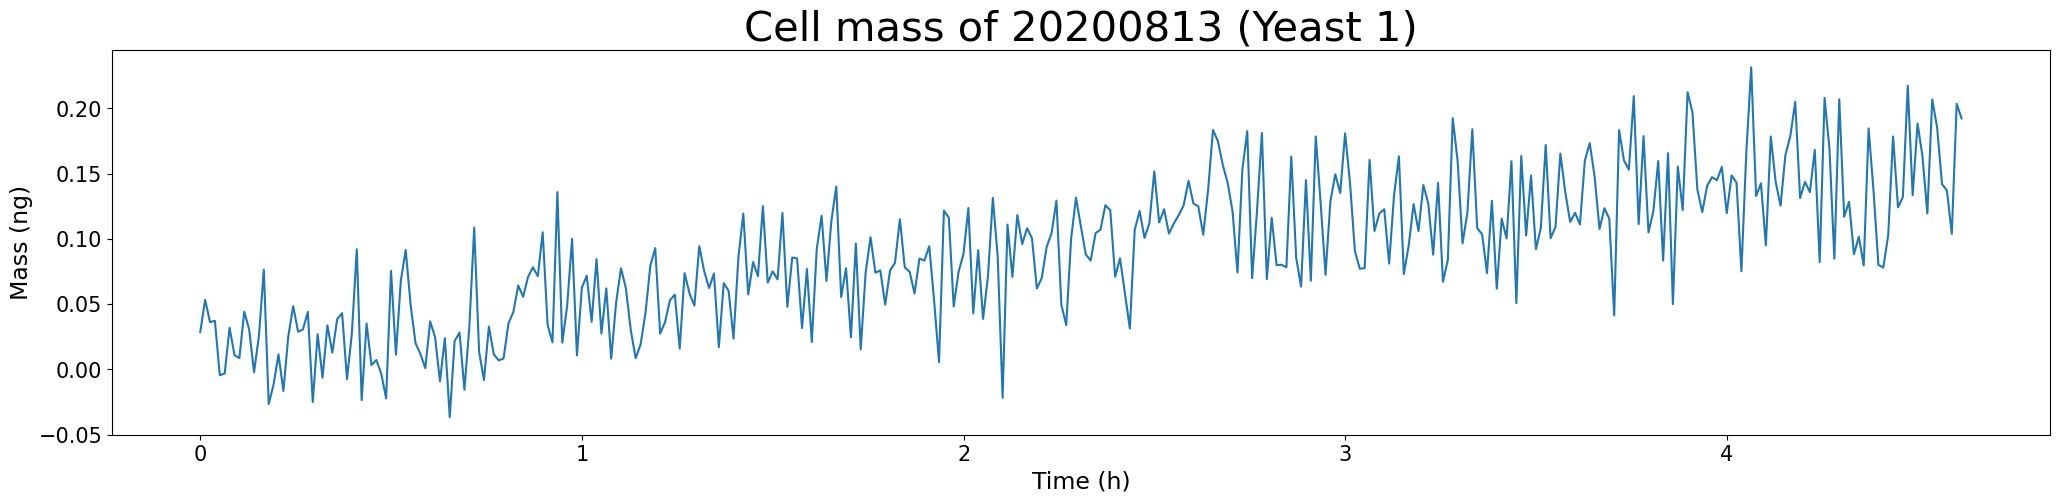

In [14]:
#20200813 (Yeast 1)
plt.figure(figsize=(25, 5))
plt.plot(df13["time"],df13["mass"] )
plt.title("Cell mass of 20200813 (Yeast 1)", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

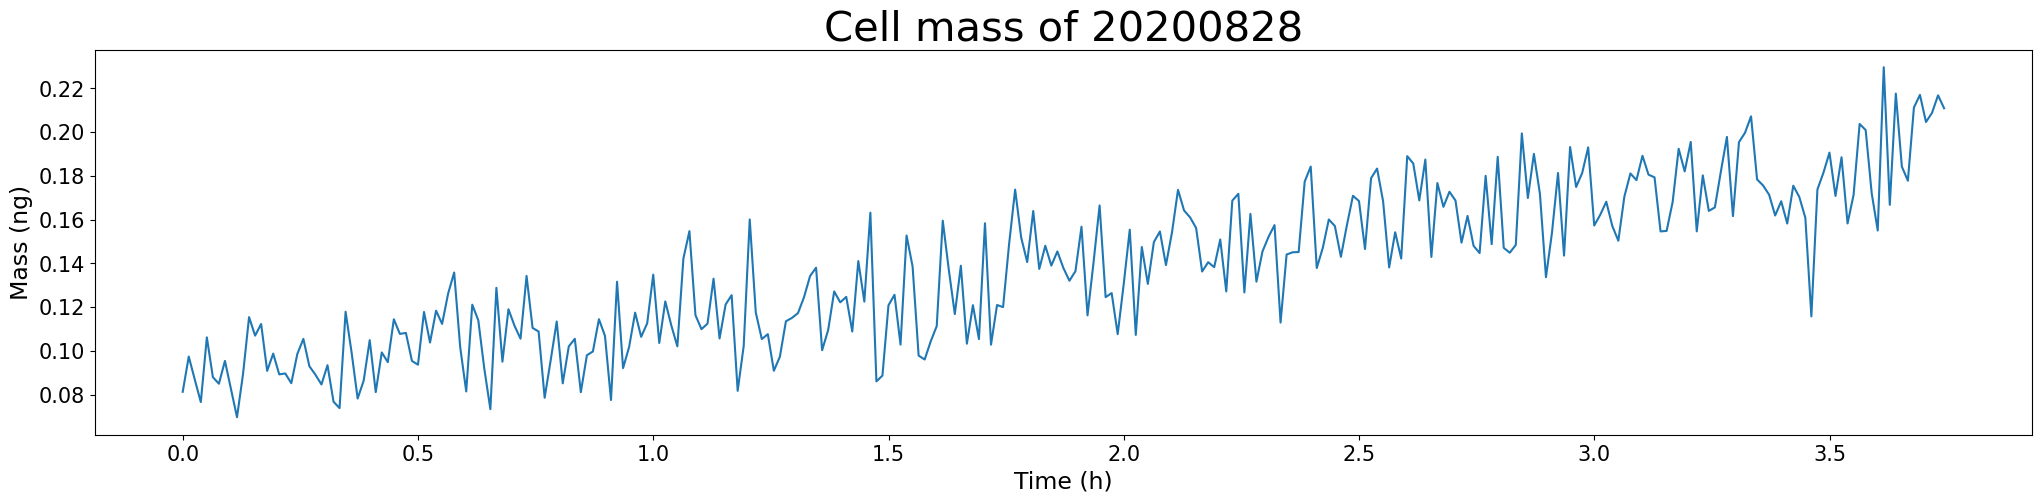

In [15]:
#20200828
plt.figure(figsize=(25, 5))
plt.plot(df28["time"],df28["mass"] )
plt.title("Cell mass of 20200828", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

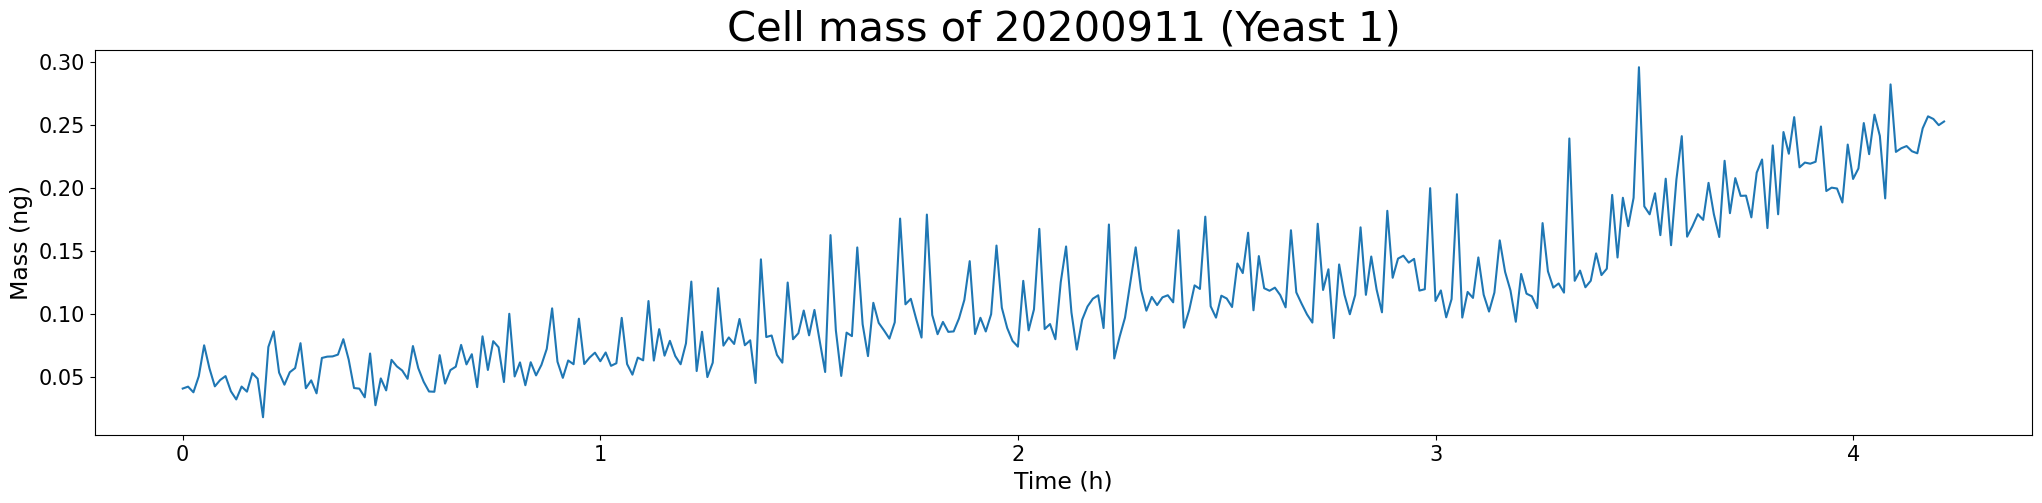

In [16]:
#20200911 (Yeast 1)
plt.figure(figsize=(25, 5))
plt.plot(df911["time"],df911["mass"] )
plt.title("Cell mass of 20200911 (Yeast 1)", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

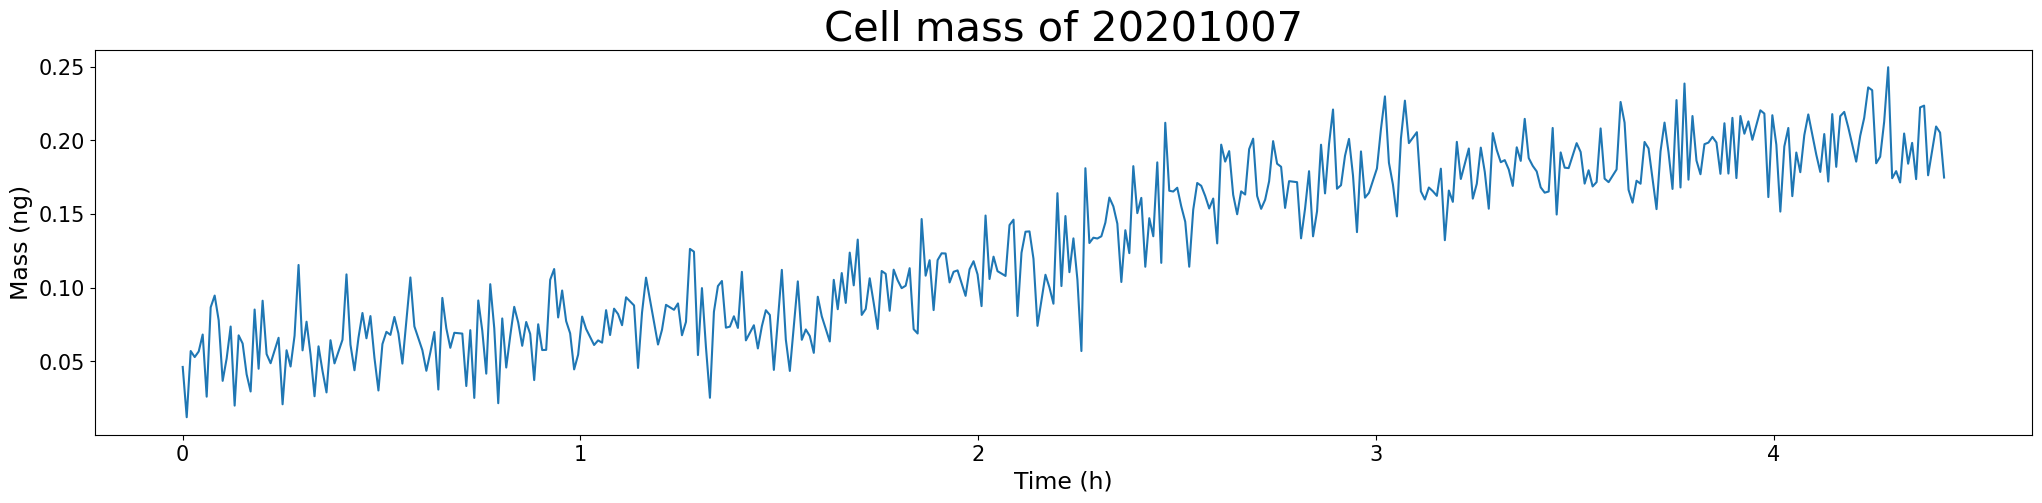

In [17]:
#20201007
plt.figure(figsize=(25, 5))
plt.plot(df007["time"],df007["mass"] )
plt.title("Cell mass of 20201007", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

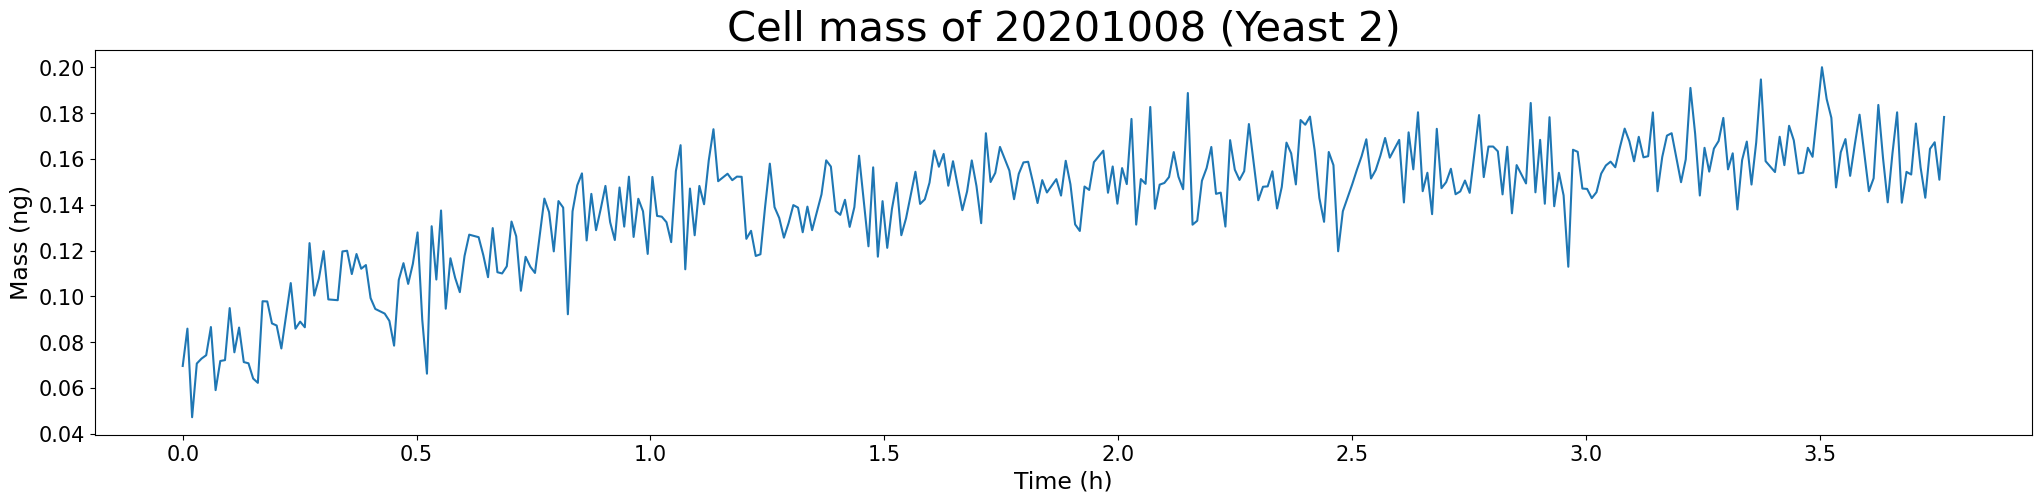

In [18]:
#20201008 (Yeast 2)
plt.figure(figsize=(25, 5))
plt.plot(df008Y2["time"],df008Y2["mass"] )
plt.title("Cell mass of 20201008 (Yeast 2)", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

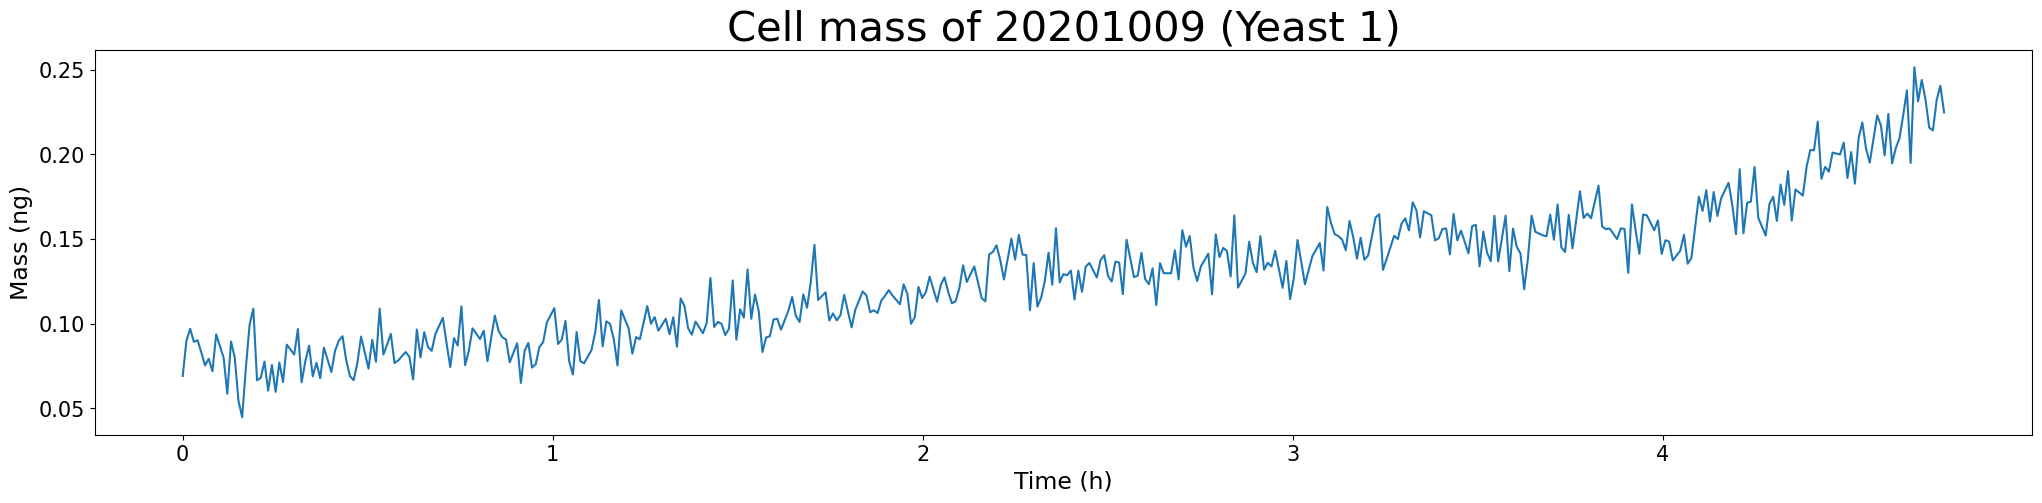

In [19]:
#20201009 (Yeast 1)
plt.figure(figsize=(25, 5))
plt.plot(df009Y1["time"],df009Y1["mass"] )
plt.title("Cell mass of 20201009 (Yeast 1)", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Calculating MP/Motifs/Discords on each

# 20200813 (Yeast 1)

It is recommended to use different window sizes when detecting motifs and discords using the matrix profile. This is because the optimal window size for detecting motifs may be different from that for detecting discords.

In [20]:
y = df13['mass']
x = df13.index

In [21]:
#for motifs
m = 8
mp = stumpy.stump(df13['mass'], m)

In [22]:
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [23]:
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

profile profile index left profile index right profile index
30   0.559641           215                 11                 215
215  0.559641            30                 30                 258

Text(0.5, 0.98, 'Finding Motifs')

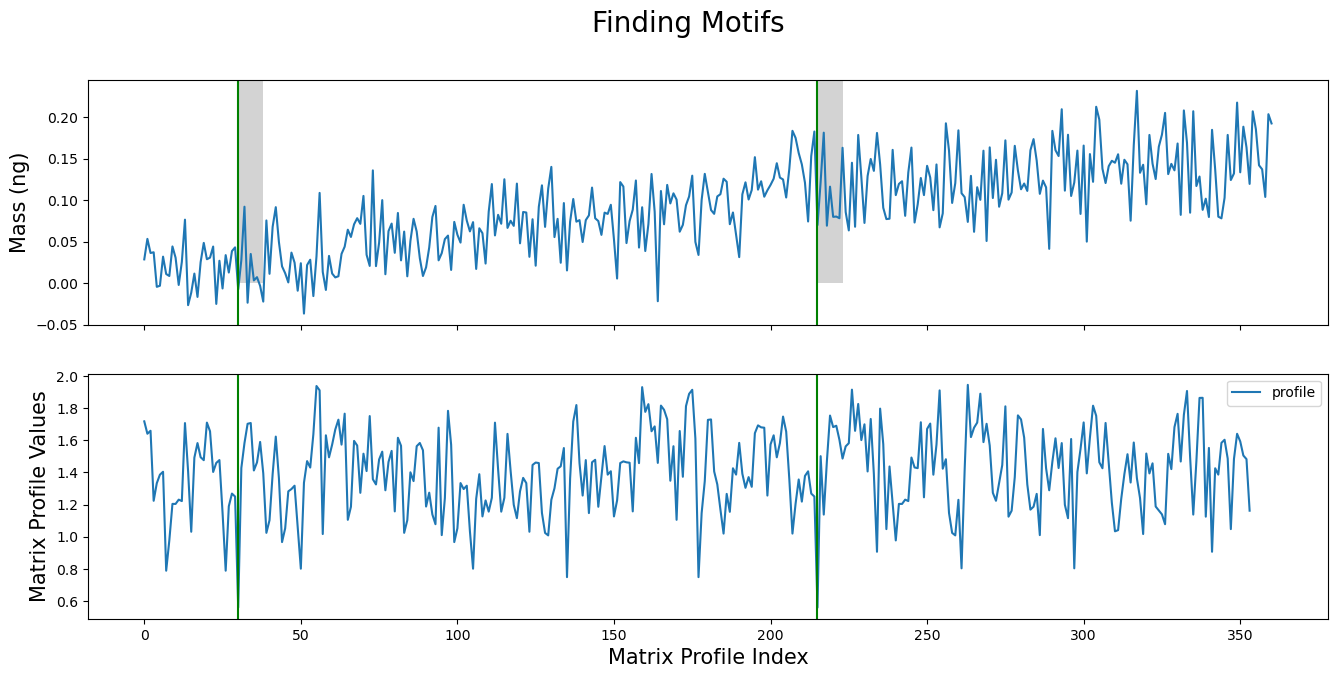

In [24]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)


Text(0.5, 1.0, 'Motifs Comparison')

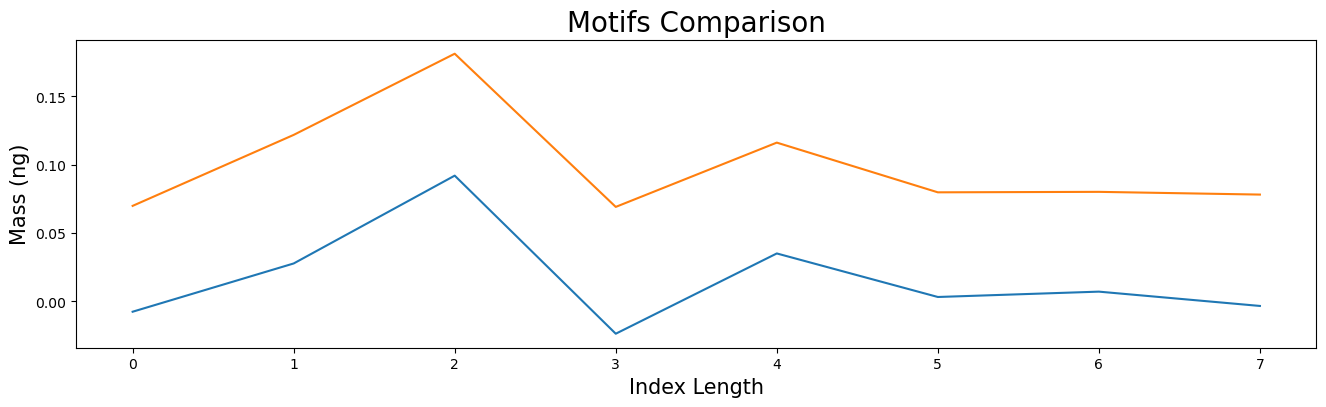

In [25]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [26]:
#for discord
m1 = 34
mp1 = stumpy.stump(df13['mass'], m1)

In [27]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [28]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

profile profile index left profile index right profile index
269  6.619245           311                 52                 311

Text(0.5, 0.98, 'Findig a Discord')

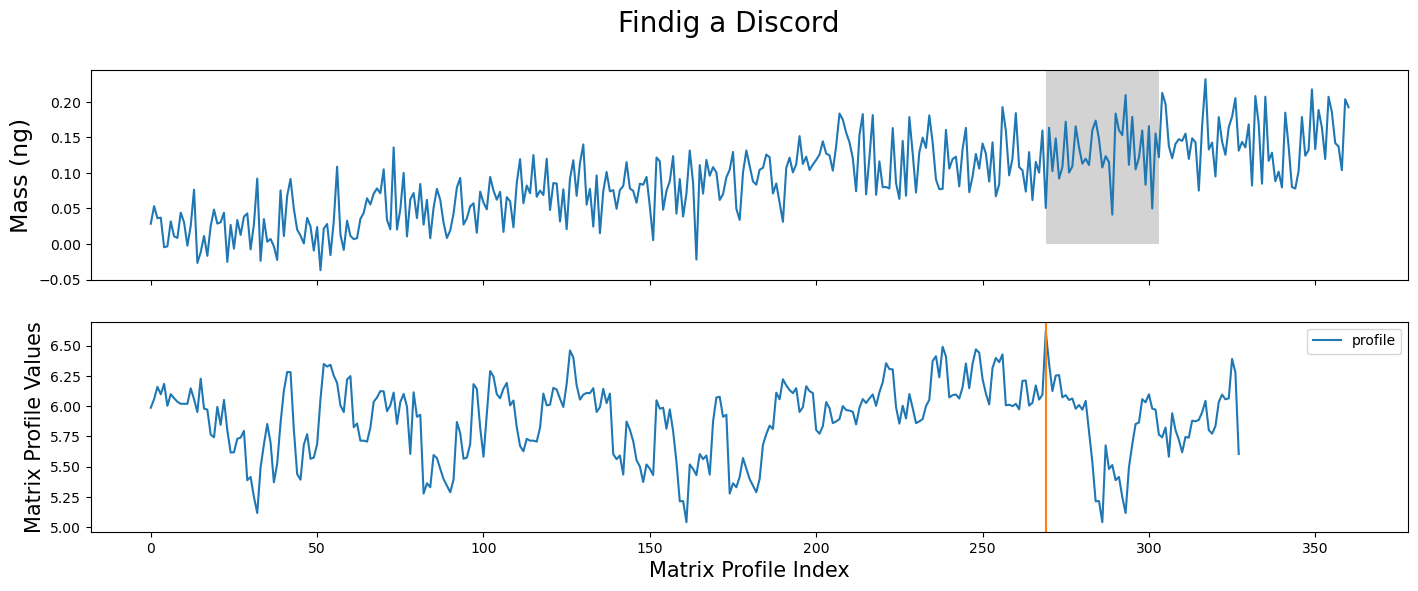

In [29]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 
rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [30]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [6.6192449844840375] units away


# 20200828

In [31]:
y = df28['mass']
x = df28.index
#for motif
m = 8
mp = stumpy.stump(df28['mass'], m)
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

profile profile index left profile index right profile index
6    0.820739           235                  0                 235
235  0.820739             6                  6                 243

Text(0.5, 0.98, 'Finding Motifs')

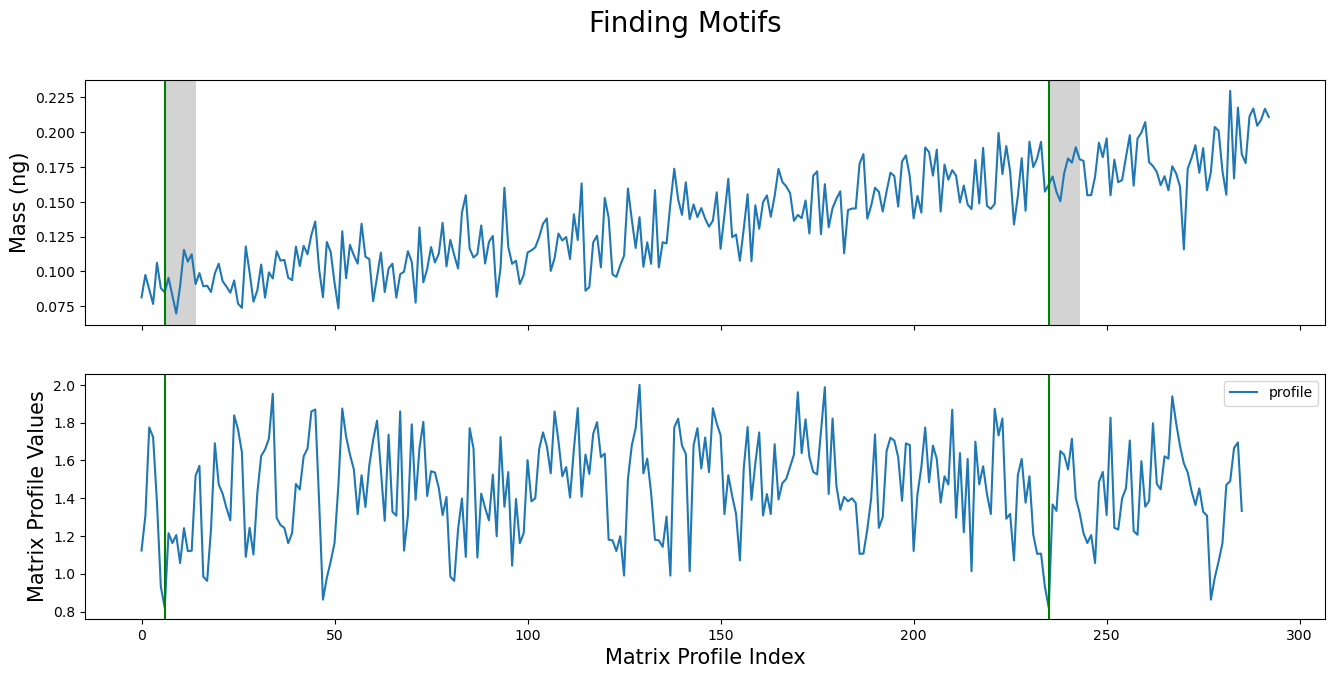

In [32]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)


Text(0.5, 1.0, 'Motifs Comparison')

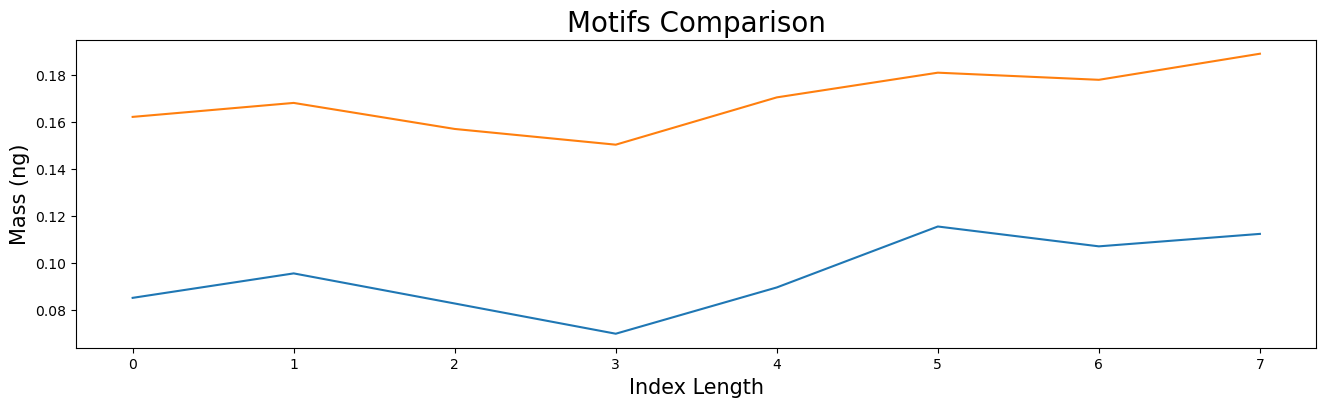

In [33]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [34]:
#for discord
m1 = 28
mp1 = stumpy.stump(df28['mass'], m1)

In [35]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [36]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

profile profile index left profile index right profile index
136  5.88466            78                 78                 207

Text(0.5, 0.98, 'Findig a Discord')

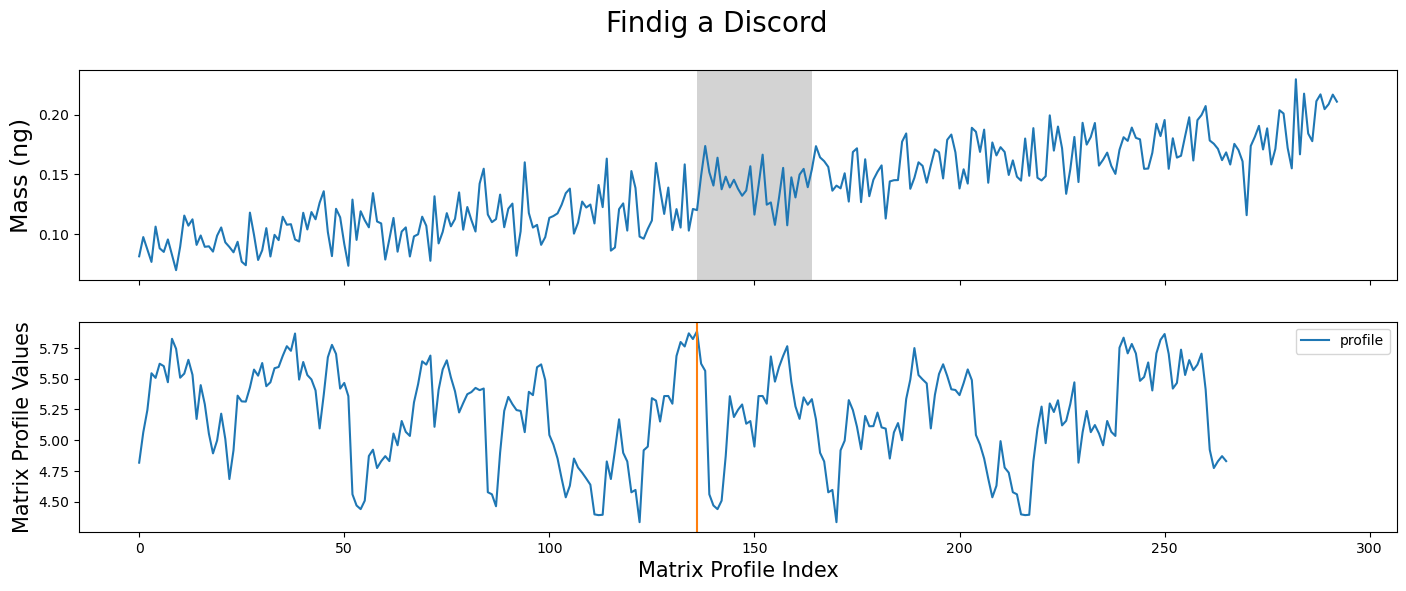

In [37]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [38]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [5.8846599288077295] units away


# 20200911 (Yeast 1)


In [39]:
y = df911['mass']
x = df911.index
#motif
m = 8
mp = stumpy.stump(df911['mass'], m)
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

profile profile index left profile index right profile index
43   0.522203           152                 30                 152
152  0.522203            43                 43                 306

Text(0.5, 0.98, 'Finding Motifs')

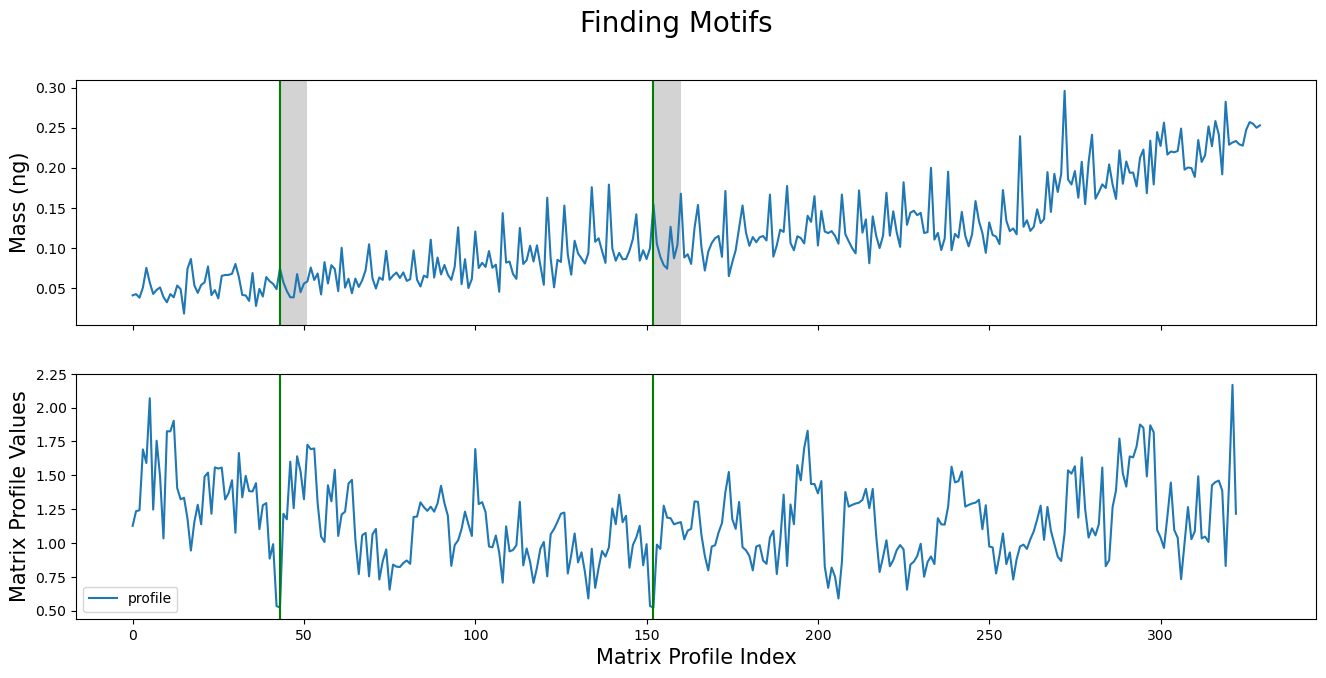

In [40]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)

Text(0.5, 1.0, 'Motifs Comparison')

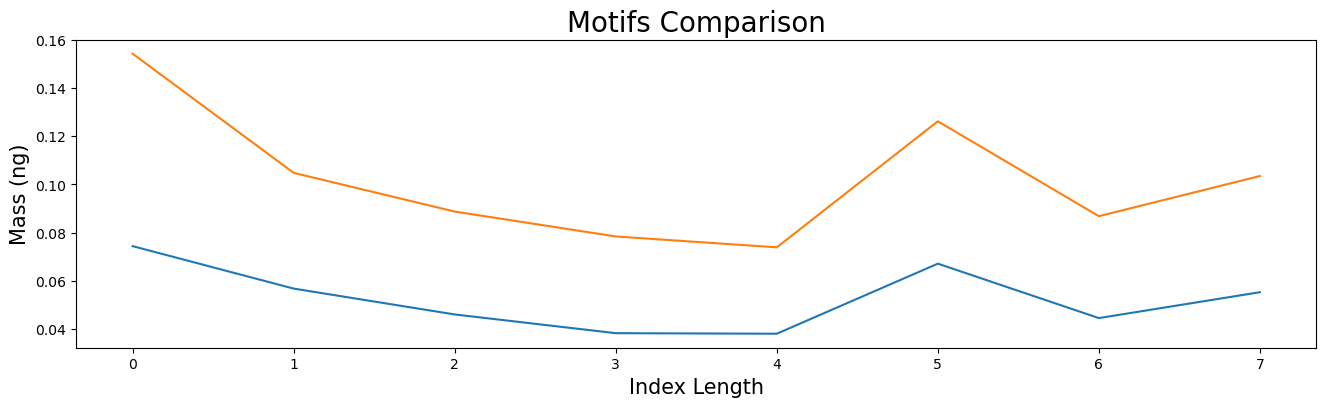

In [41]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [42]:
#for discord
m1 = 37
mp1 = stumpy.stump(df911['mass'], m1)

In [43]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [44]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

profile profile index left profile index right profile index
264  6.253612           251                251                 286

Text(0.5, 0.98, 'Findig a Discord')

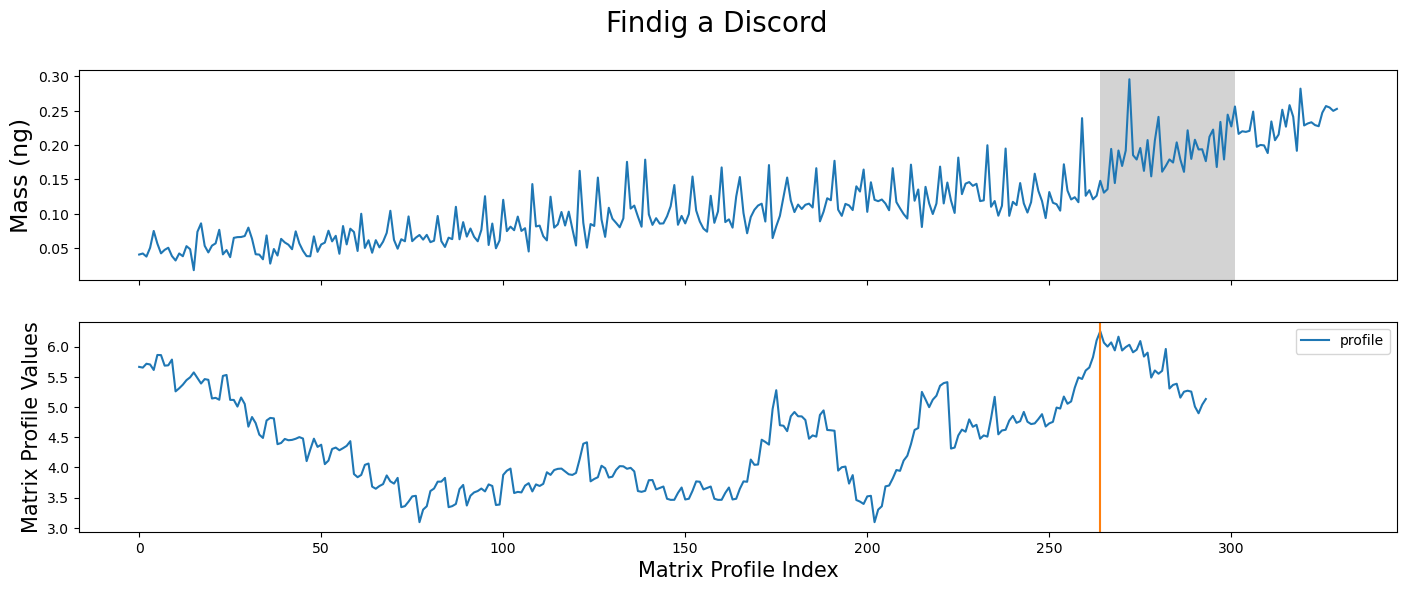

In [45]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [46]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [6.253612427278698] units away


# 20201007

In [47]:
y = df007['mass']
x = df007.index
#motif
m = 8
mp = stumpy.stump(df007['mass'], m)
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

profile profile index left profile index right profile index
89   0.766425           108                 27                 108
108  0.766425            89                 89                 340

Text(0.5, 0.98, 'Finding Motifs')

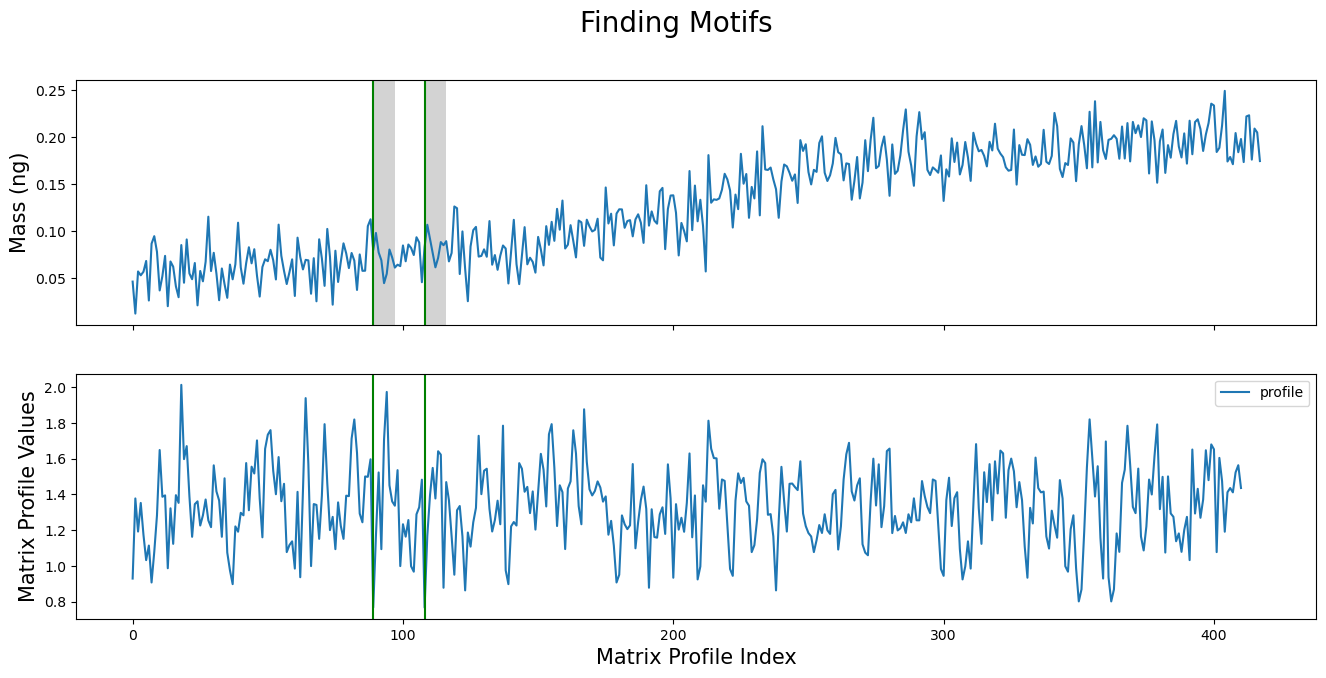

In [48]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)

Text(0.5, 1.0, 'Motifs Comparison')

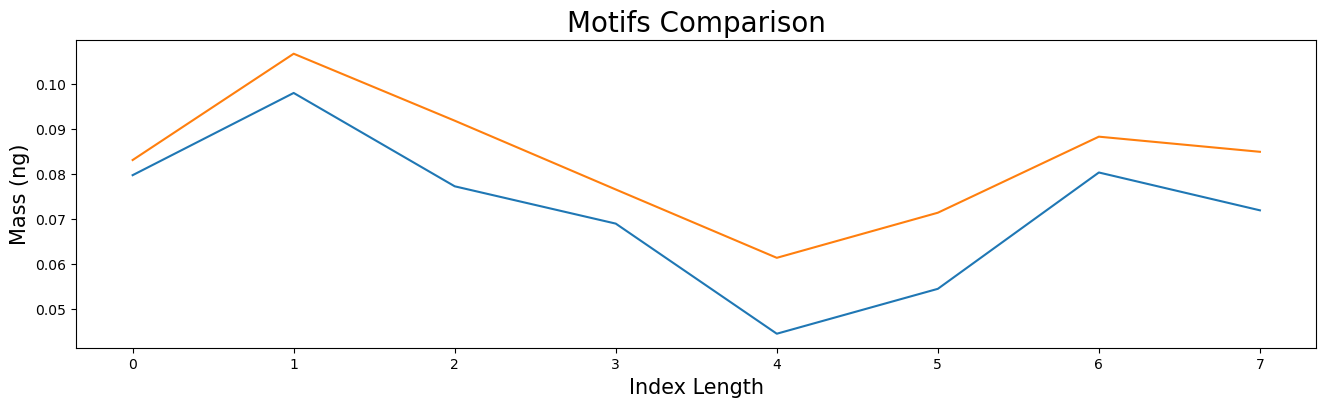

In [49]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [50]:
#for discord
m1 = 43
mp1 = stumpy.stump(df007['mass'], m1)

In [51]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [52]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

profile profile index left profile index right profile index
107  7.527862            57                 57                 343

Text(0.5, 0.98, 'Findig a Discord')

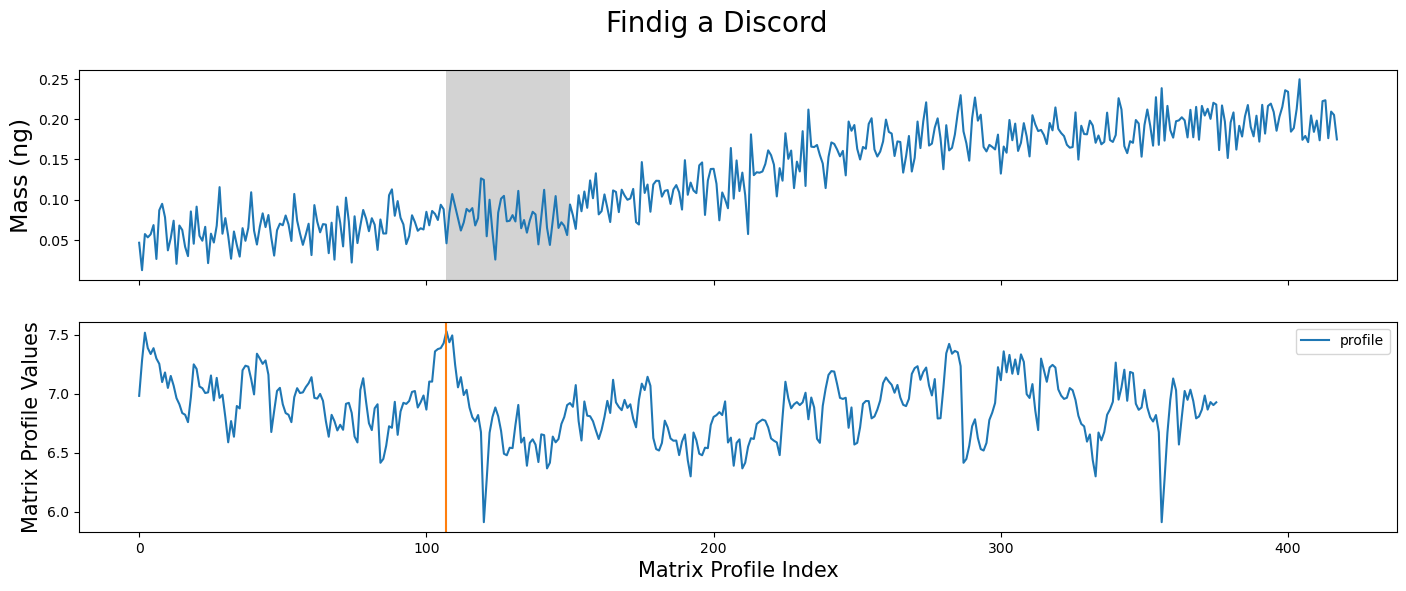

In [53]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [54]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [7.527862449080732] units away


# 20201008 (Yeast 2)

In [55]:
y = df008Y2['mass']
x = df008Y2.index
#motif
m = 8
mp = stumpy.stump(df008Y2['mass'], m)
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

profile profile index left profile index right profile index
182  0.647478           262                100                 262
262  0.647478           182                182                 302

Text(0.5, 0.98, 'Finding Motifs')

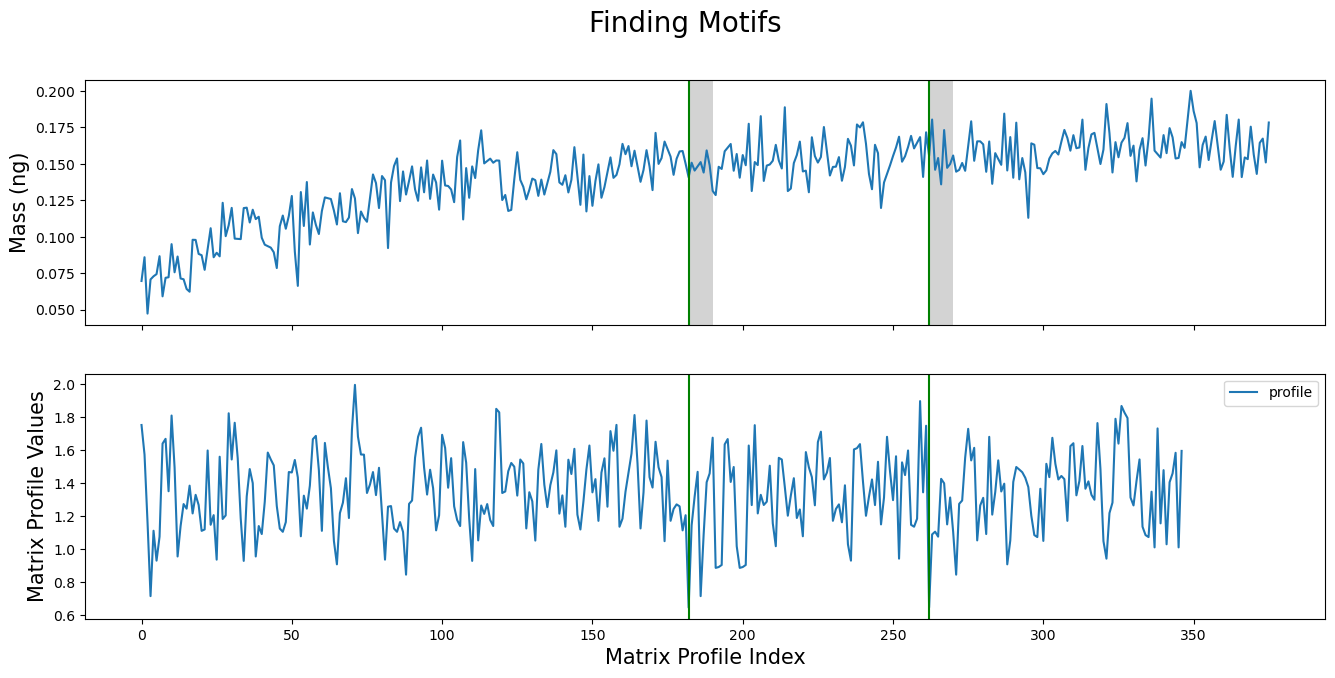

In [56]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)

Text(0.5, 1.0, 'Motifs Comparison')

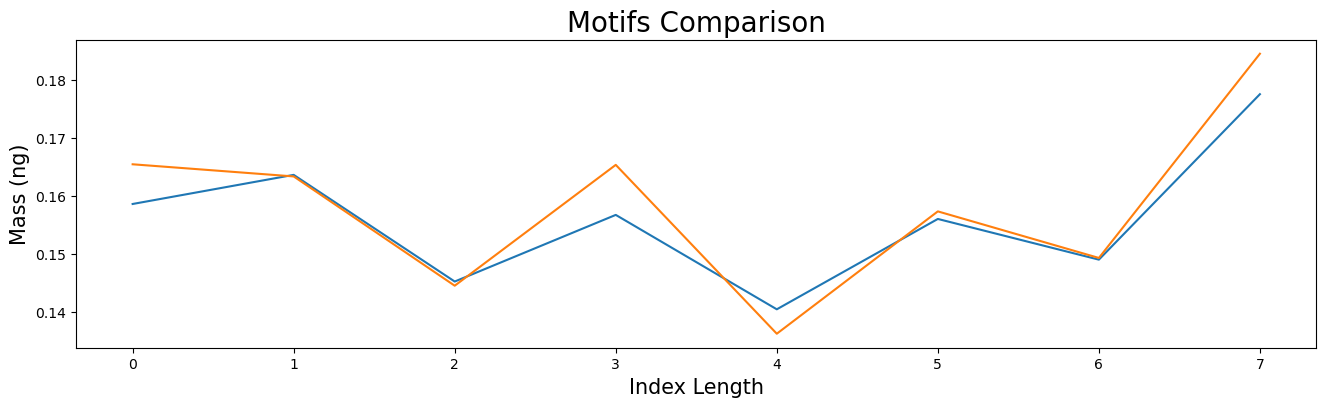

In [57]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [58]:
#for discord
m1 = 28
mp1 = stumpy.stump(df008Y2['mass'], m1)

In [59]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [60]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

profile profile index left profile index right profile index
99  5.805911            24                 24                 216

Text(0.5, 0.98, 'Findig a Discord')

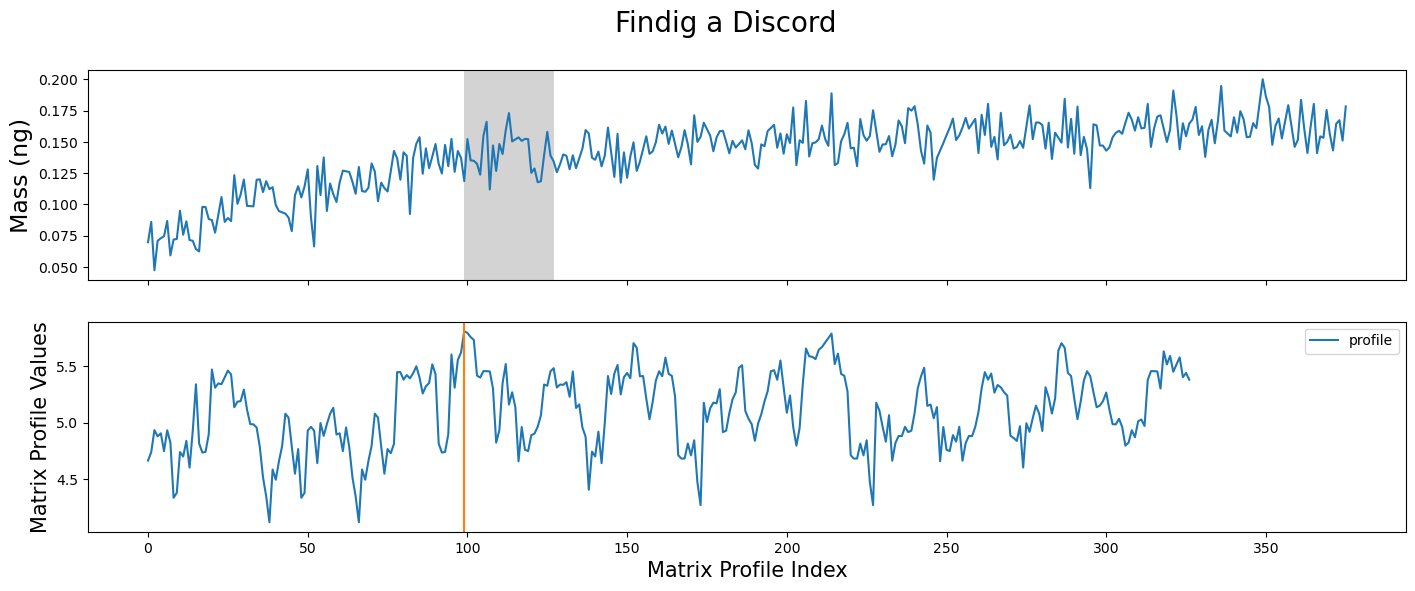

In [61]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [62]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [5.805911218772581] units away


# 20201009 (Yeast 1)

In [63]:
y = df009Y1['mass']
x = df009Y1.index
#motif
m = 8
mp = stumpy.stump(df009Y1['mass'], m)
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

profile profile index left profile index right profile index
250  0.424102           421                 54                 421
421  0.424102           250                250                 426

Text(0.5, 0.98, 'Finding Motifs')

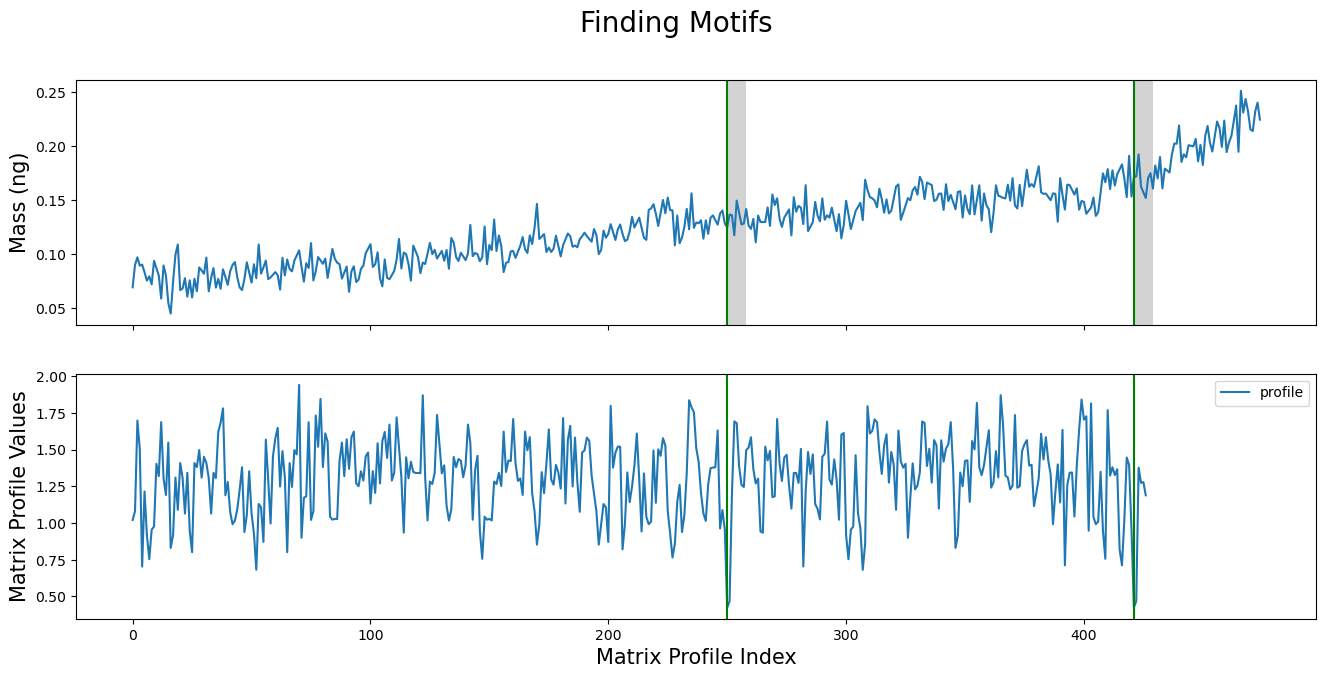

In [64]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)

Text(0.5, 1.0, 'Motifs Comparison')

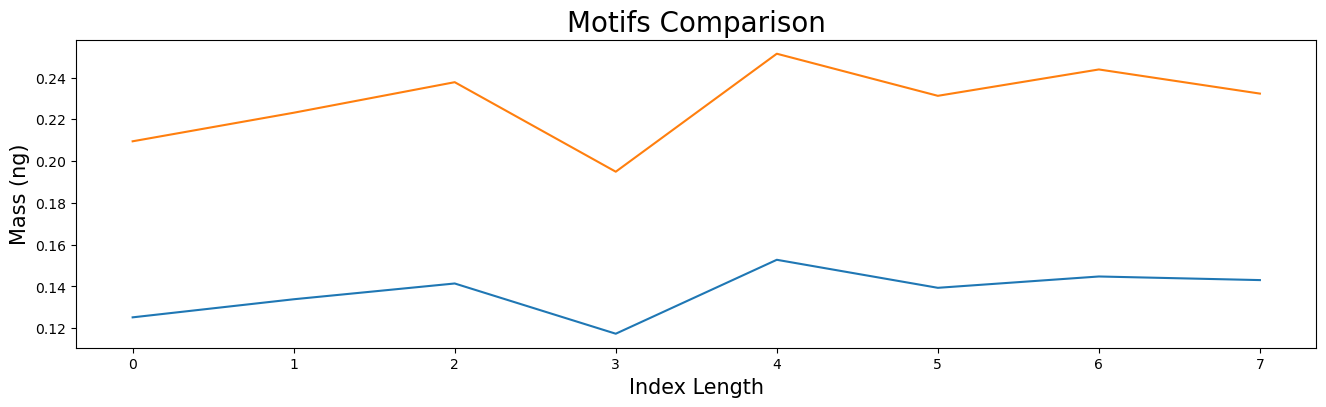

In [65]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [66]:
#for discord
m1 = 43
mp1 = stumpy.stump(df009Y1['mass'], m1)

In [67]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [68]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

profile profile index left profile index right profile index
289  7.641687           181                181                 328

Text(0.5, 0.98, 'Findig a Discord')

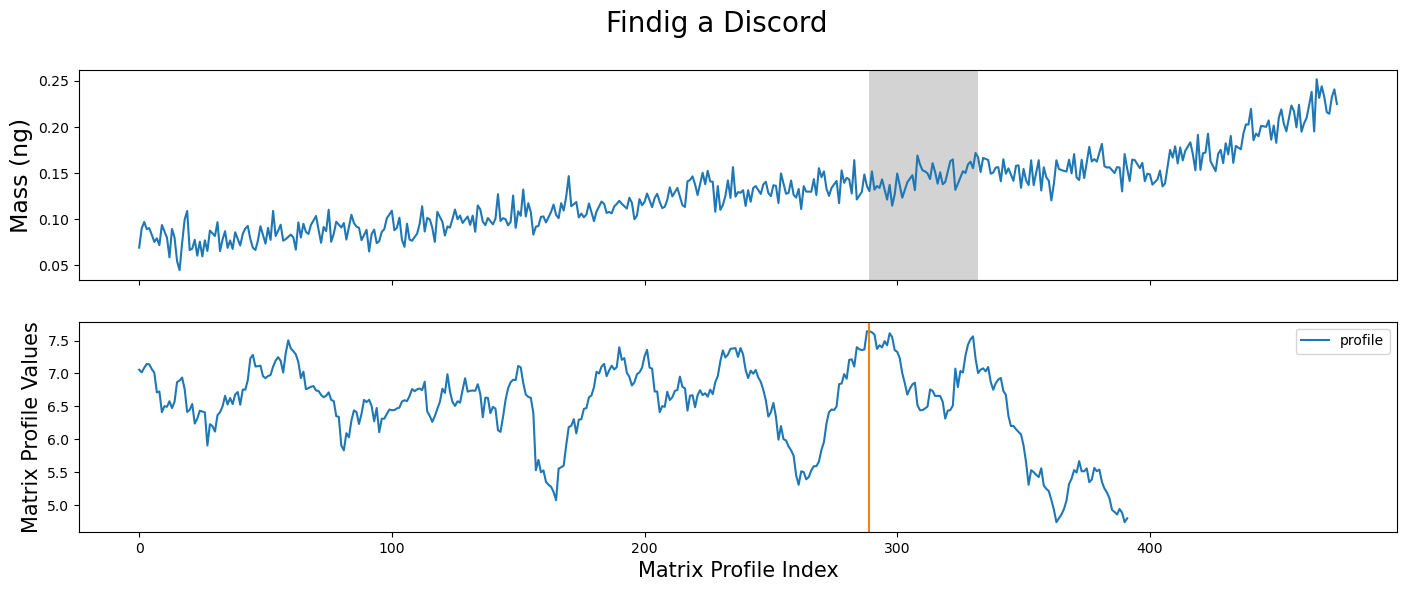

In [69]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [70]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [7.641686602605472] units away


# Finding Similar Patterns in Datasets

Comparing the datasets that have similar trajectory and shape to find hidden similar patterns

# 20200813 (Yeast 1) with 20200828

In [71]:
m = 8
mp13 = stumpy.stump(T_A = df13['mass'],
                  m = m,
                  T_B = df28['mass'],
                  ignore_trivial = False)

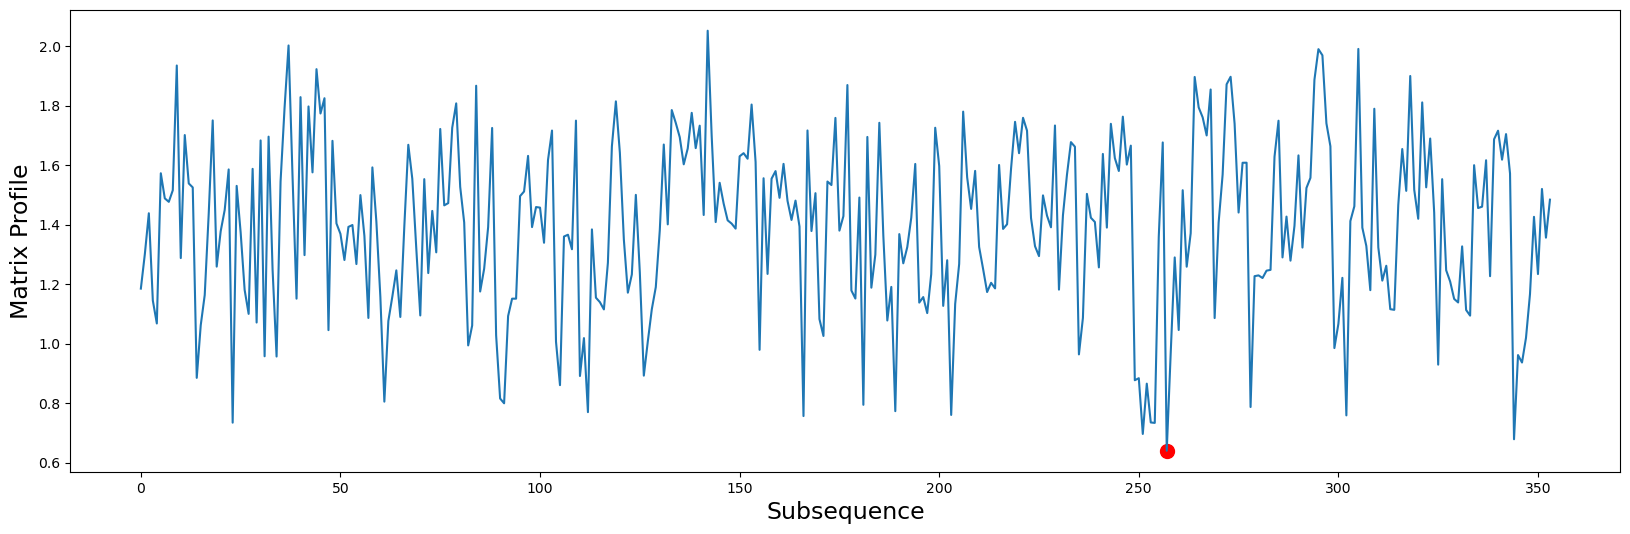

In [72]:
df13_motif_index = mp13[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df13_motif_index,
               mp13[df13_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp13[:,0])
plt.show()

In [73]:
df13_motif_index = mp13[:, 0].argmin()
print(f'The motif is located at index {df13_motif_index} of "20200813 (Yeast 1)"')

The motif is located at index 257 of "20200813 (Yeast 1)"


In [74]:
df28_motif_index = mp13[df13_motif_index, 1]
print(f'The motif is located at index {df28_motif_index} of "20200828"')


The motif is located at index 149 of "20200828"


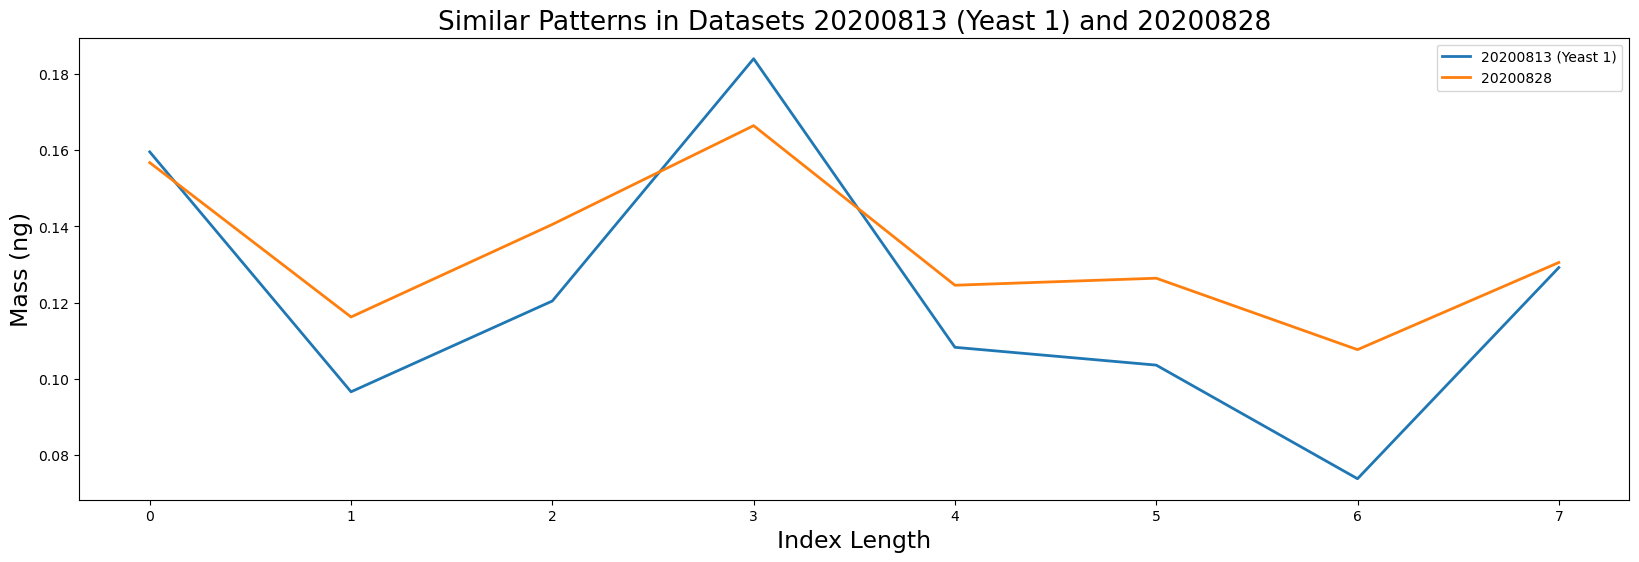

In [75]:
plt.plot(df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)
plt.plot(df28['mass'].iloc[df28_motif_index:df28_motif_index+m].values, label='20200828', linewidth=2)

plt.title('Similar Patterns in Datasets 20200813 (Yeast 1) and 20200828', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

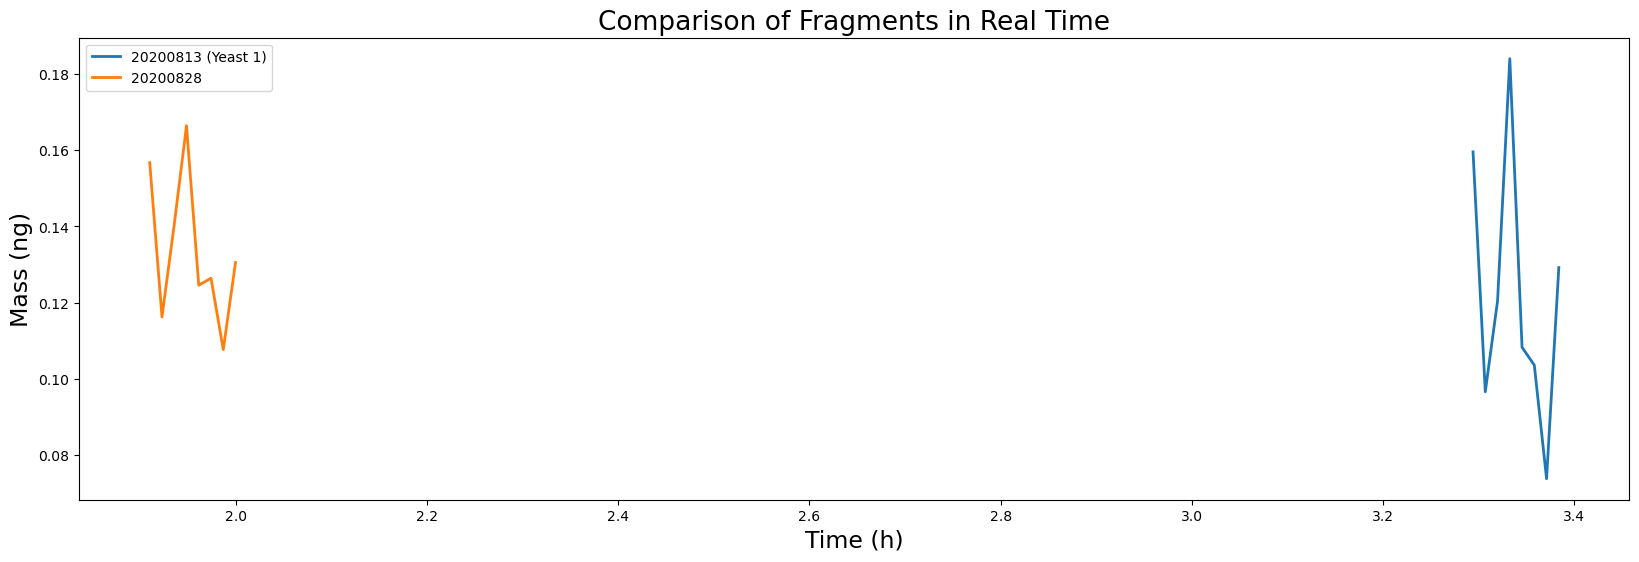

In [76]:
plt.plot(df13['time'].iloc[df13_motif_index : df13_motif_index + m].values, df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)
plt.plot(df28['time'].iloc[df28_motif_index : df28_motif_index + m].values, df28['mass'].iloc[df28_motif_index : df28_motif_index + m].values, label='20200828', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()



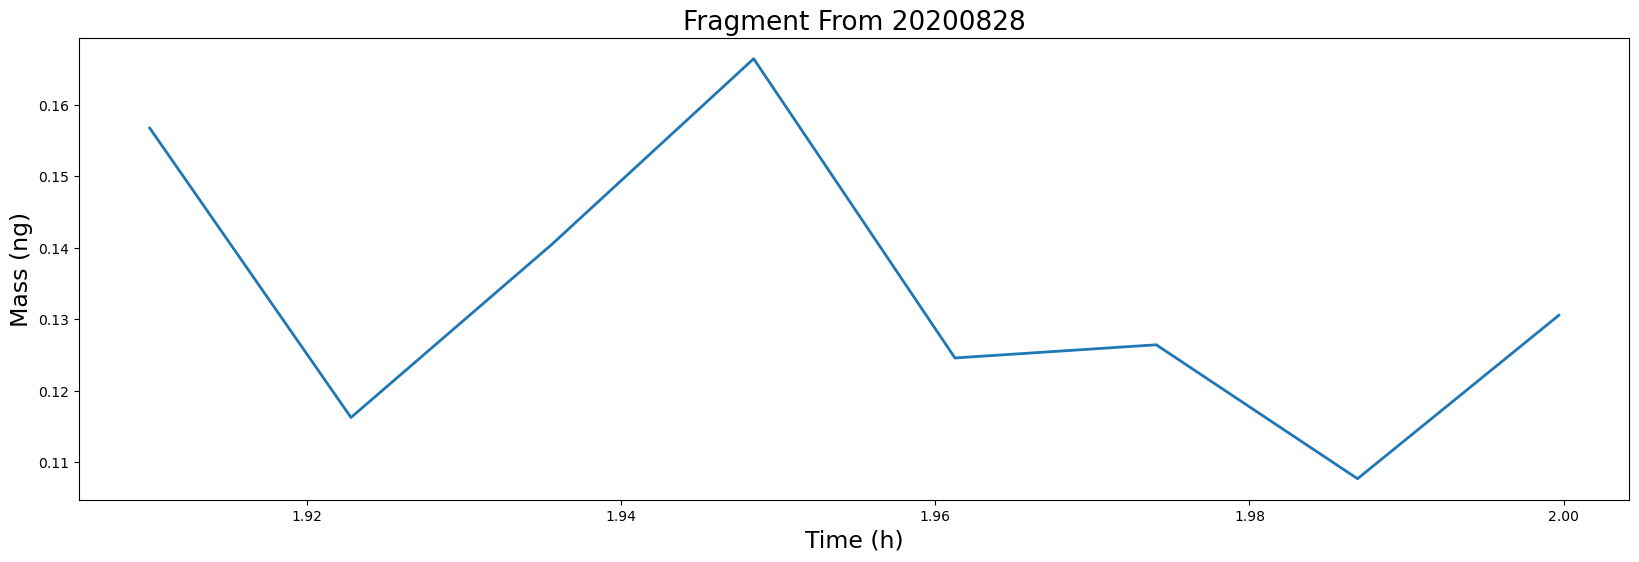

In [77]:
plt.plot(df28['time'].iloc[df28_motif_index : df28_motif_index + m].values, df28['mass'].iloc[df28_motif_index : df28_motif_index + m].values, label='20200828', linewidth=2)

plt.title('Fragment From 20200828', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

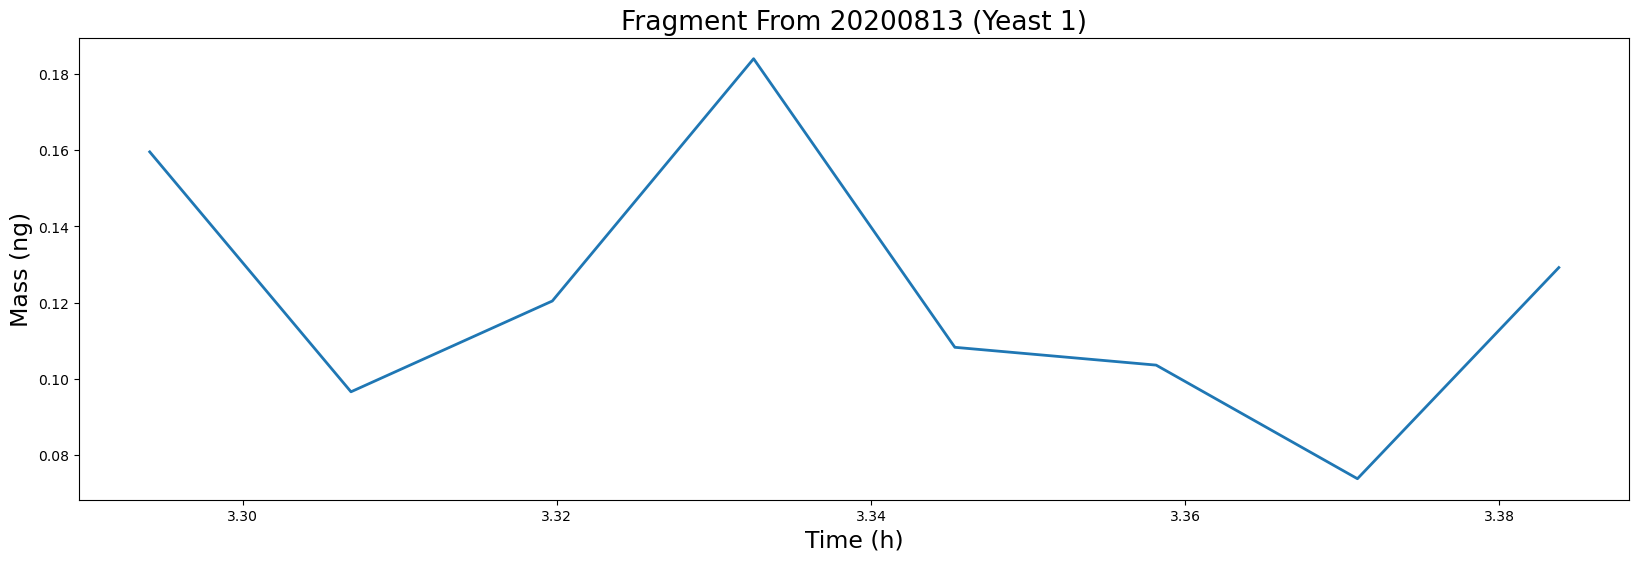

In [78]:
plt.plot(df13['time'].iloc[df13_motif_index : df13_motif_index + m].values, df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)

plt.title('Fragment From 20200813 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

# 20200813 (Yeast 1) with 20200911 (Yeast 1)

In [79]:
m = 9
mp13 = stumpy.stump(T_A = df13['mass'],
                  m = m,
                  T_B = df911['mass'],
                  ignore_trivial = False)

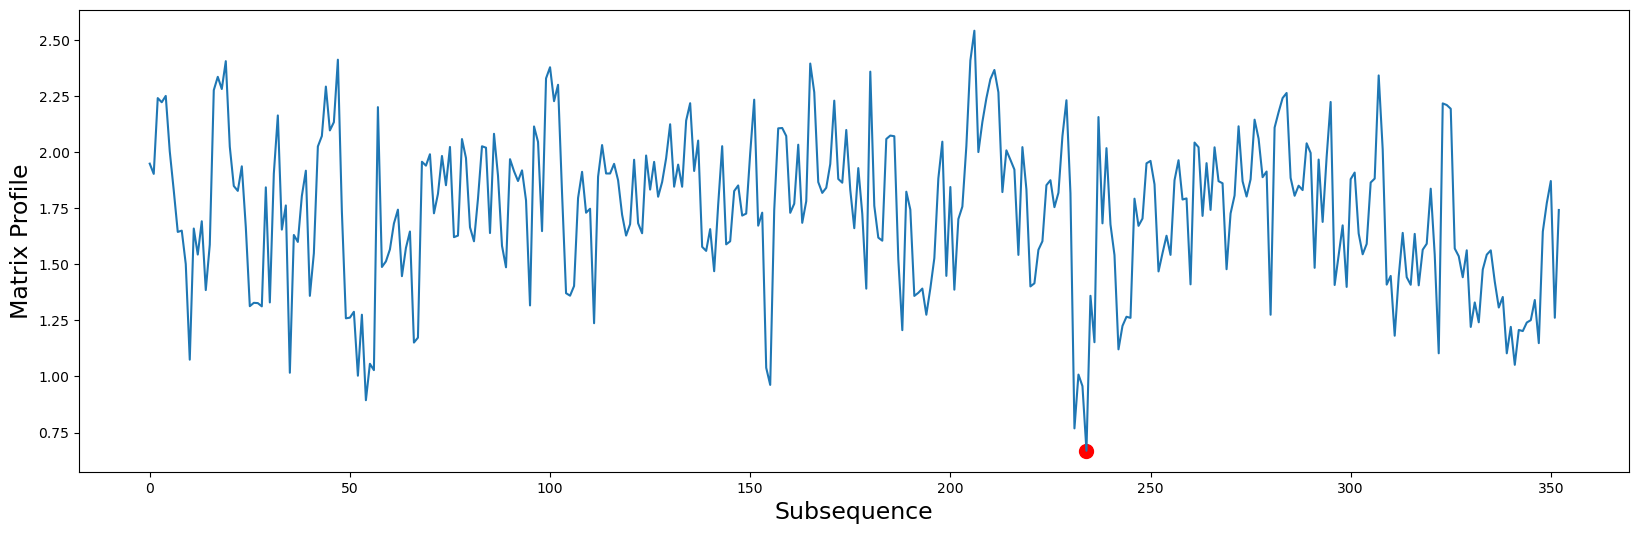

In [80]:
df13_motif_index = mp13[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df13_motif_index,
               mp13[df13_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp13[:,0])
plt.show()

In [81]:
df13_motif_index = mp13[:, 0].argmin()
print(f'The motif is located at index {df13_motif_index} of "20200813 (Yeast 1)"')

The motif is located at index 234 of "20200813 (Yeast 1)"


In [82]:
df911_motif_index = mp13[df13_motif_index, 1]
print(f'The motif is located at index {df911_motif_index} of "20200911 (Yeast 1)"')


The motif is located at index 43 of "20200911 (Yeast 1)"


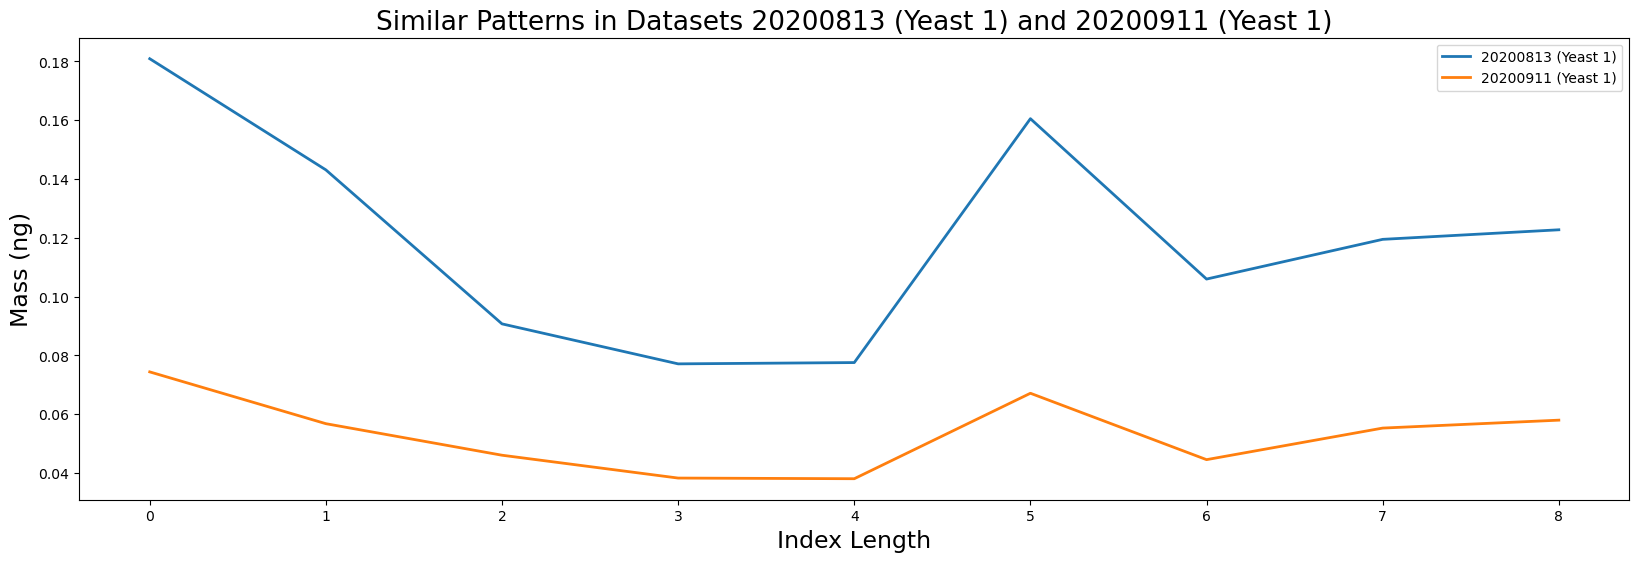

In [83]:
plt.plot(df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)
plt.plot(df911['mass'].iloc[df911_motif_index:df911_motif_index+m].values, label='20200911 (Yeast 1)', linewidth=2)


plt.title('Similar Patterns in Datasets 20200813 (Yeast 1) and 20200911 (Yeast 1)', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)


plt.legend()

plt.show()

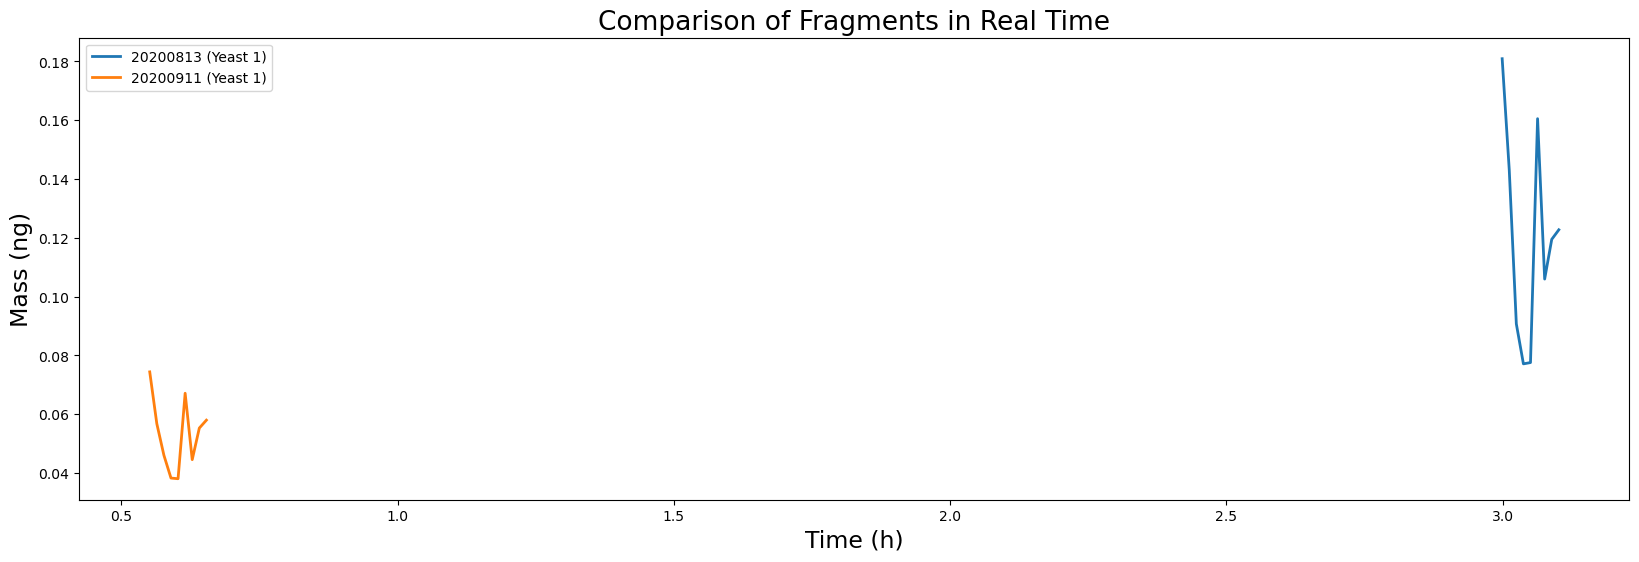

In [84]:
plt.plot(df13['time'].iloc[df13_motif_index : df13_motif_index + m].values, df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)
plt.plot(df911['time'].iloc[df911_motif_index : df911_motif_index + m].values, df911['mass'].iloc[df911_motif_index : df911_motif_index + m].values, label='20200911 (Yeast 1)', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)


plt.legend()
plt.show()

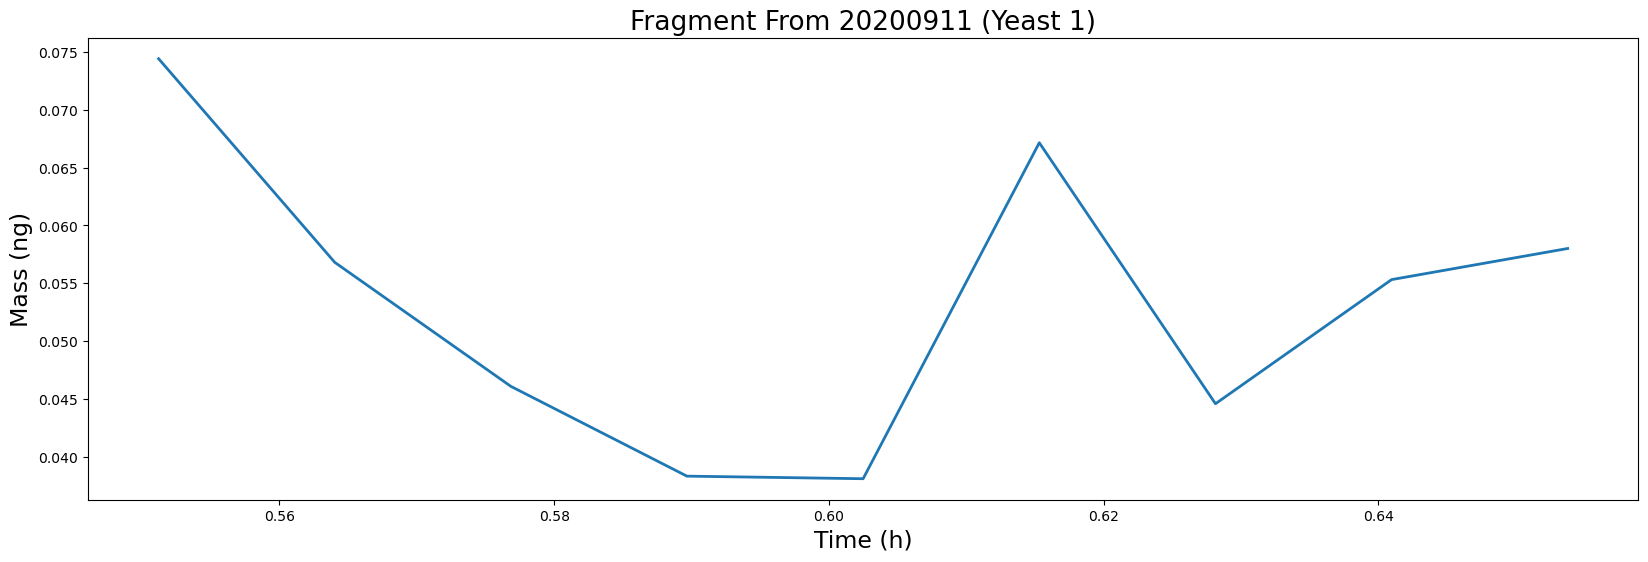

In [85]:
plt.plot(df911['time'].iloc[df911_motif_index : df911_motif_index + m].values, df911['mass'].iloc[df911_motif_index : df911_motif_index + m].values, label='20200911 (Yeast 1)', linewidth=2)

plt.title('Fragment From 20200911 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

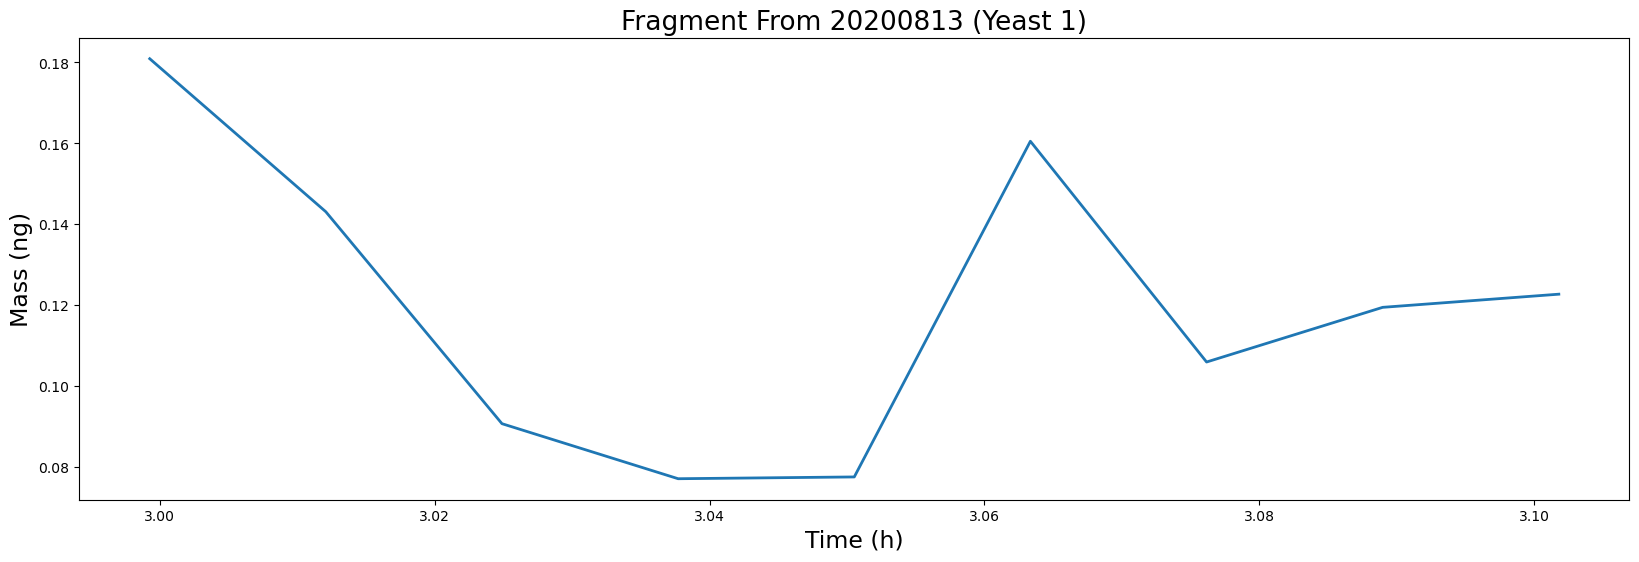

In [86]:
plt.plot(df13['time'].iloc[df13_motif_index : df13_motif_index + m].values, df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)
plt.title('Fragment From 20200813 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20200813 (Yeast 1) and 20201007

In [87]:
m = 12
mp13 = stumpy.stump(T_A = df13['mass'],
                  m = m,
                  T_B = df007['mass'],
                  ignore_trivial = False)

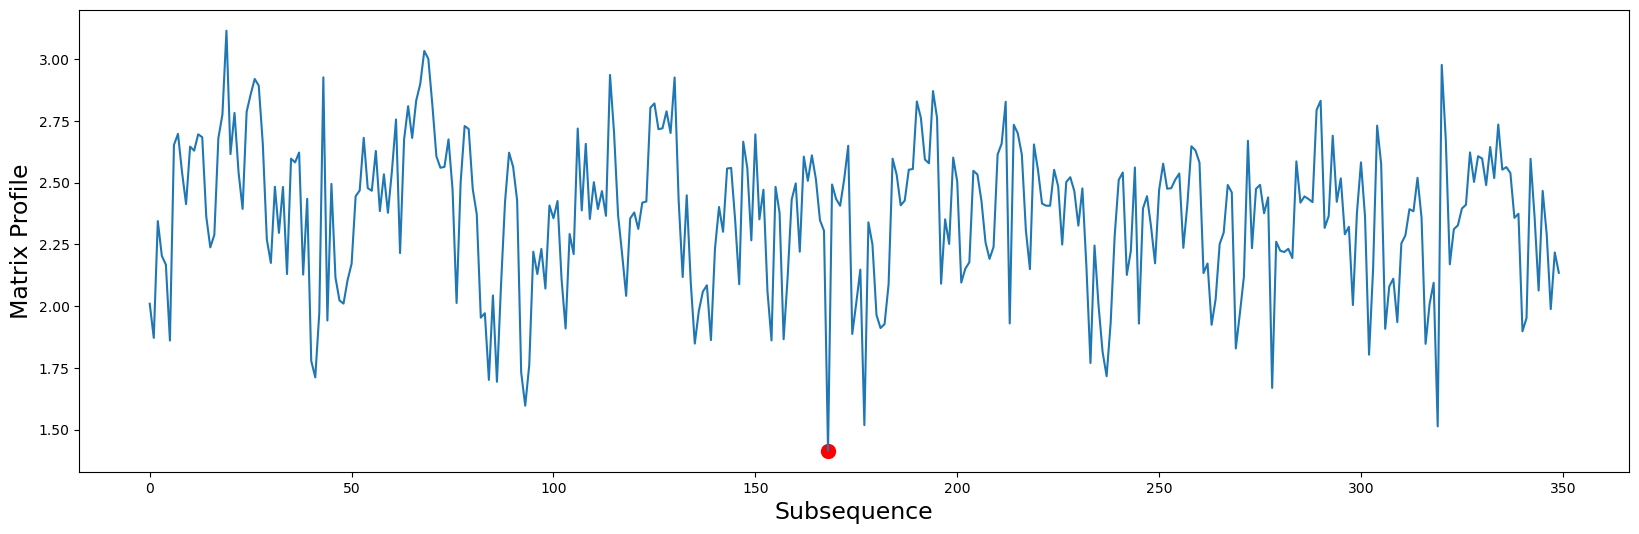

In [88]:
df13_motif_index = mp13[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df13_motif_index,
               mp13[df13_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp13[:,0])
plt.show()

In [89]:
df13_motif_index = mp13[:, 0].argmin()
print(f'The motif is located at index {df13_motif_index} of "20200813 (Yeast 1)"')

The motif is located at index 168 of "20200813 (Yeast 1)"


In [90]:
df007_motif_index = mp13[df13_motif_index, 1]
print(f'The motif is located at index {df007_motif_index} of "20201007"')


The motif is located at index 393 of "20201007"


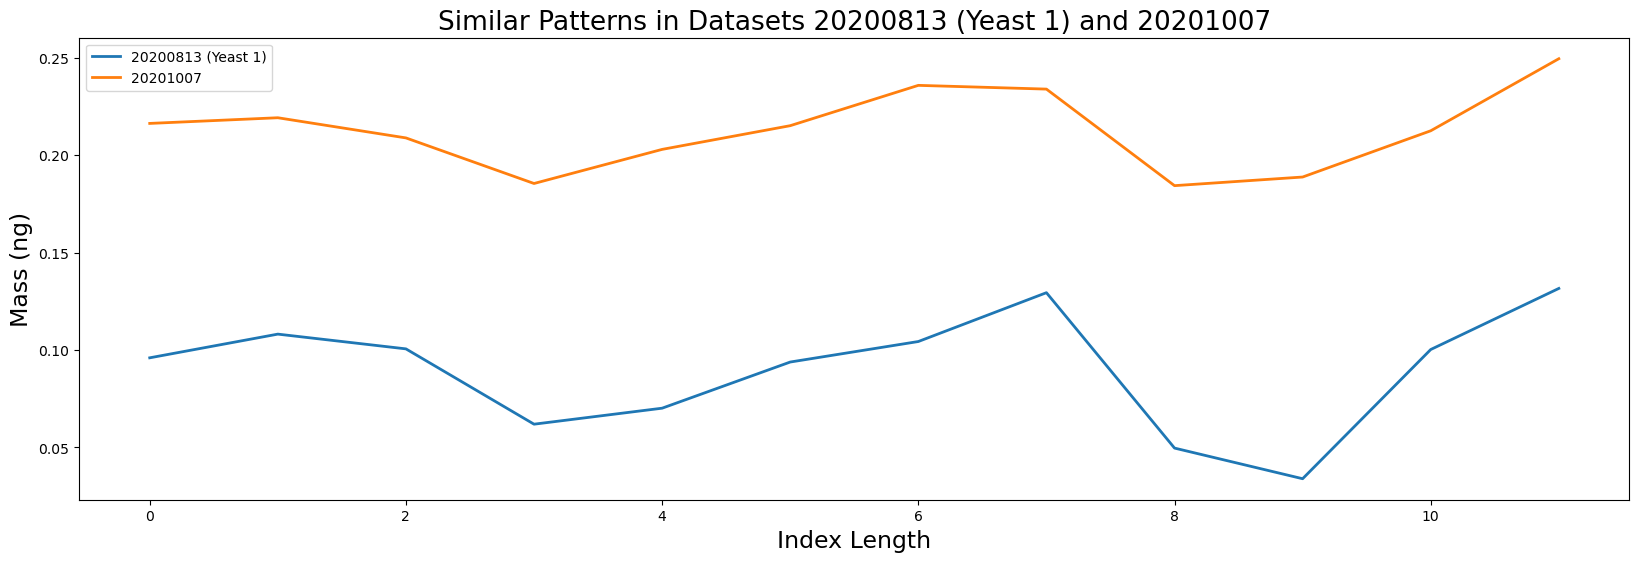

In [91]:
plt.plot(df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)
plt.plot(df007['mass'].iloc[df007_motif_index:df007_motif_index+m].values, label='20201007', linewidth=2)

plt.title('Similar Patterns in Datasets 20200813 (Yeast 1) and 20201007', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

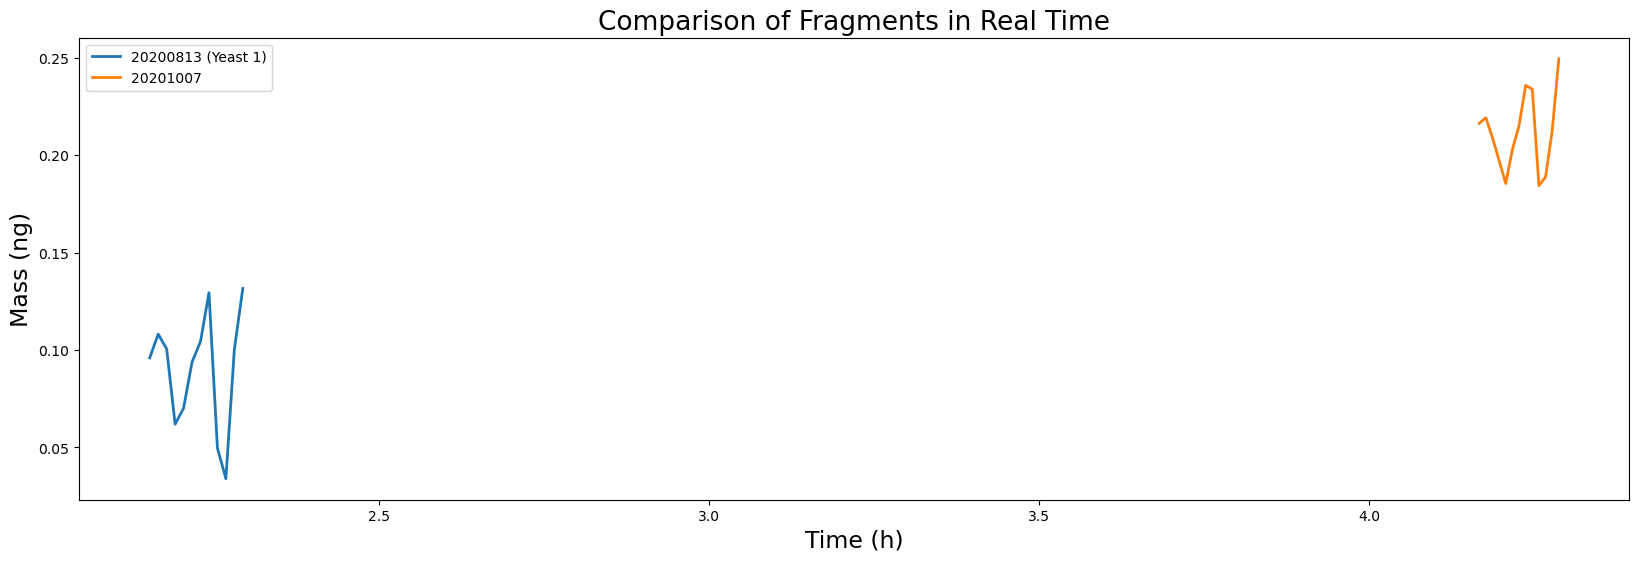

In [92]:
plt.plot(df13['time'].iloc[df13_motif_index : df13_motif_index + m].values, df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)
plt.plot(df007['time'].iloc[df007_motif_index : df007_motif_index + m].values, df007['mass'].iloc[df007_motif_index : df007_motif_index + m].values, label='20201007', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

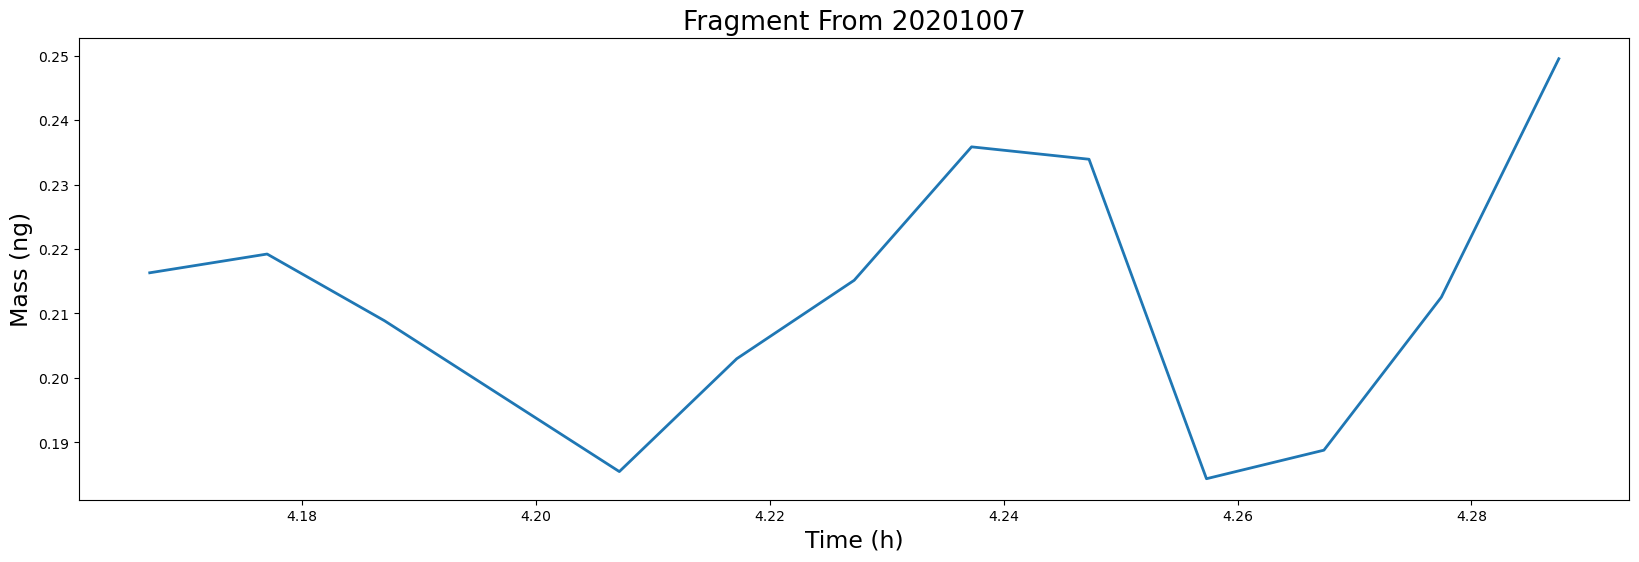

In [93]:
plt.plot(df007['time'].iloc[df007_motif_index : df007_motif_index + m].values, df007['mass'].iloc[df007_motif_index : df007_motif_index + m].values, label='20201007', linewidth=2)


plt.title('Fragment From 20201007', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

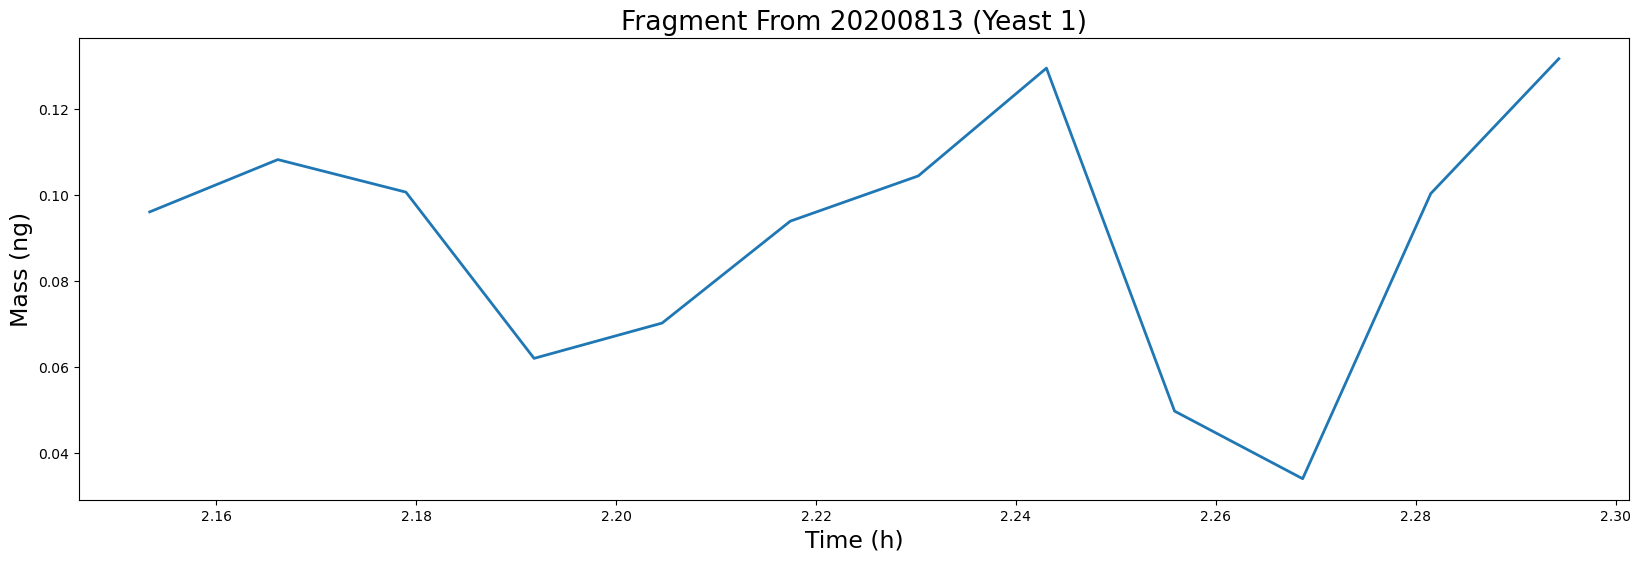

In [94]:
plt.plot(df13['time'].iloc[df13_motif_index : df13_motif_index + m].values, df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)

plt.title('Fragment From 20200813 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20200813 (Yeast 1) and 20201008 (Yeast 2)

In [95]:
m = 13
mp13 = stumpy.stump(T_A = df13['mass'],
                  m = m,
                  T_B = df008Y2['mass'],
                  ignore_trivial = False)

df13_motif_index = mp13[:, 0].argmin()

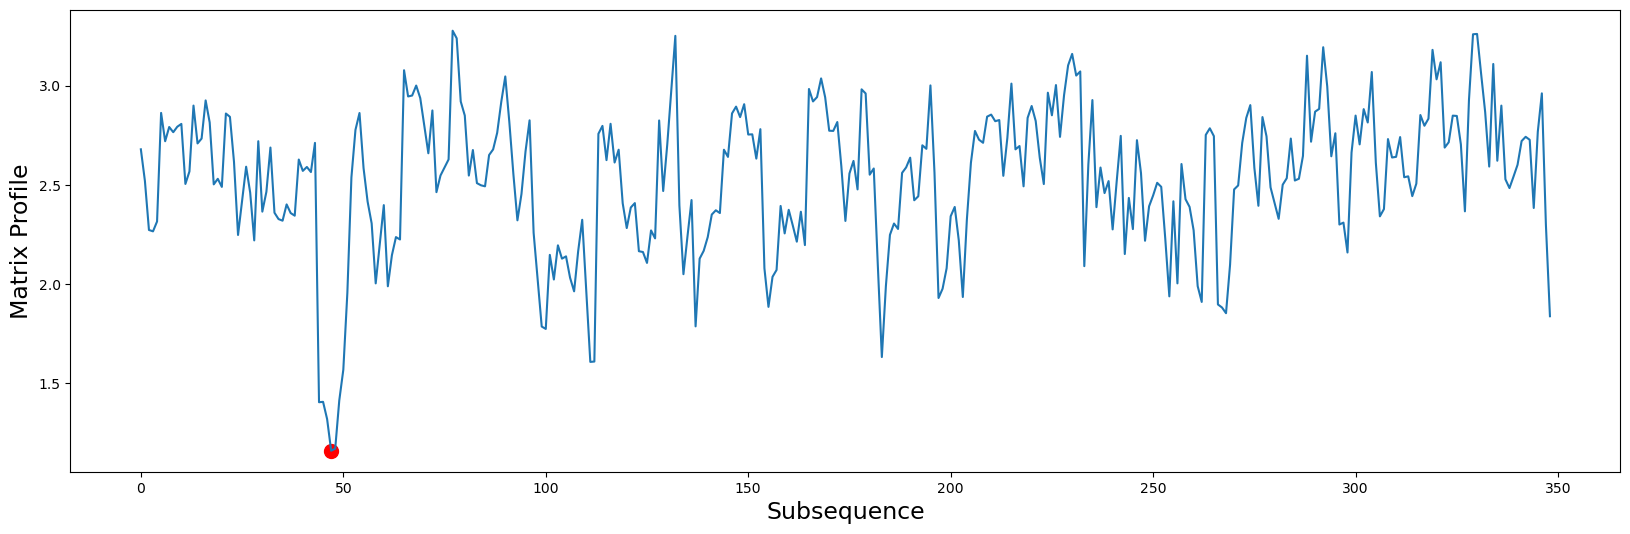

In [96]:
df13_motif_index = mp13[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df13_motif_index,
               mp13[df13_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp13[:,0])
plt.show()

In [97]:
df13_motif_index = mp13[:, 0].argmin()
print(f'The motif is located at index {df13_motif_index} of "20200813 (Yeast 1)"')

The motif is located at index 47 of "20200813 (Yeast 1)"


In [98]:
df008Y2_motif_index = mp13[df13_motif_index, 1]
print(f'The motif is located at index {df008Y2_motif_index} of "20201008 (Yeast 2)"')


The motif is located at index 308 of "20201008 (Yeast 2)"


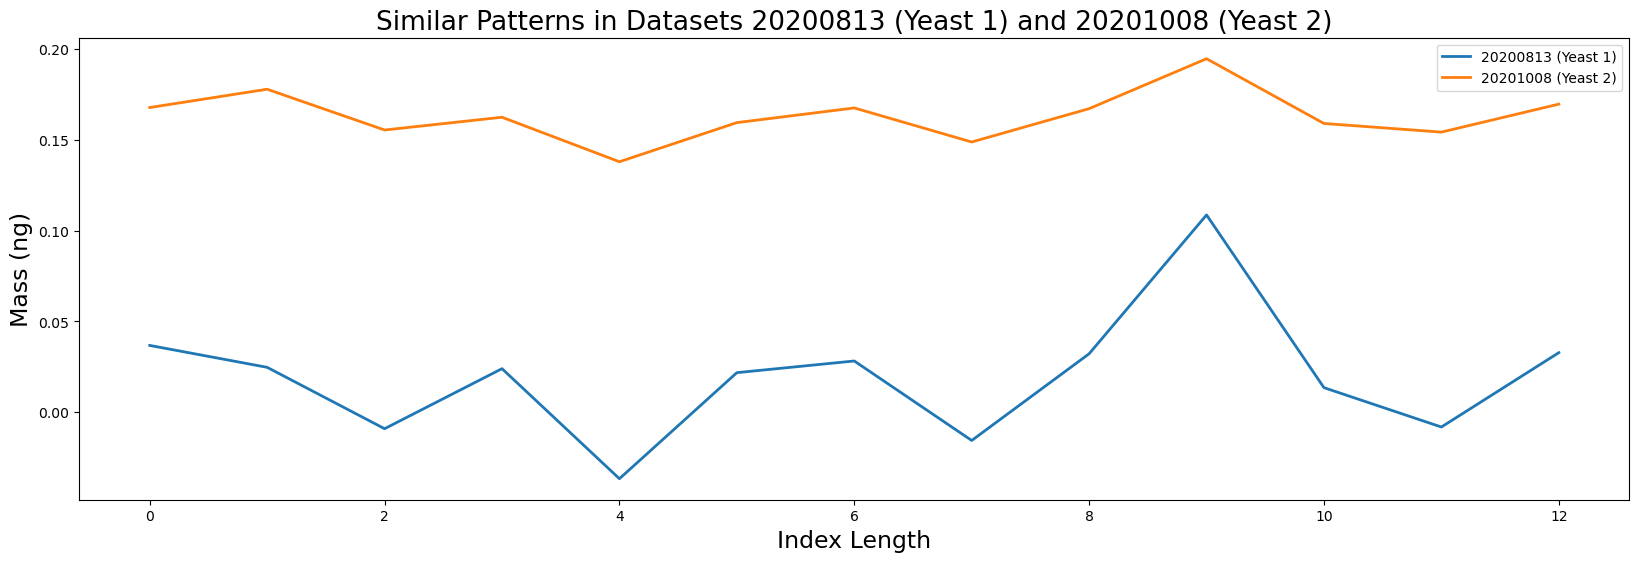

In [99]:
plt.plot(df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)
plt.plot(df008Y2['mass'].iloc[df008Y2_motif_index:df008Y2_motif_index+m].values, label='20201008 (Yeast 2)', linewidth=2)


plt.title('Similar Patterns in Datasets 20200813 (Yeast 1) and 20201008 (Yeast 2)', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

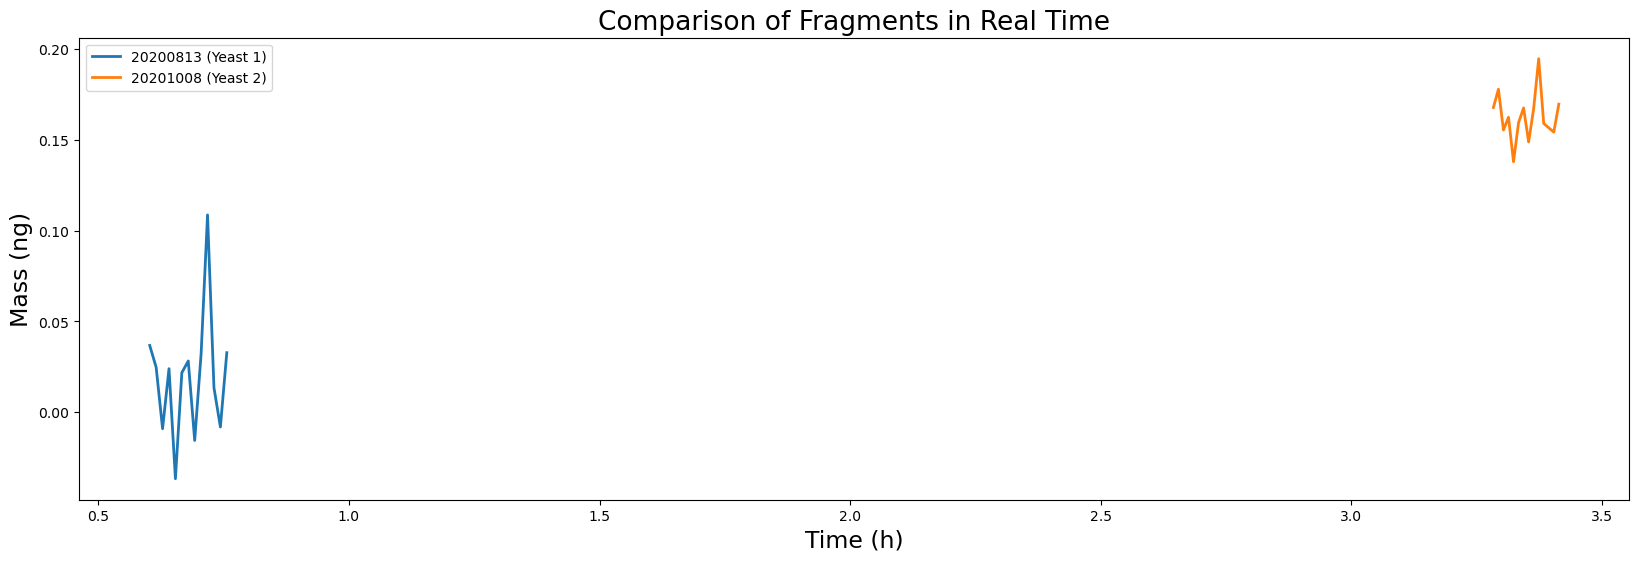

In [100]:
plt.plot(df13['time'].iloc[df13_motif_index : df13_motif_index + m].values, df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)
plt.plot(df008Y2['time'].iloc[df008Y2_motif_index : df008Y2_motif_index + m].values, df008Y2['mass'].iloc[df008Y2_motif_index : df008Y2_motif_index + m].values, label='20201008 (Yeast 2)', linewidth=2)
plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

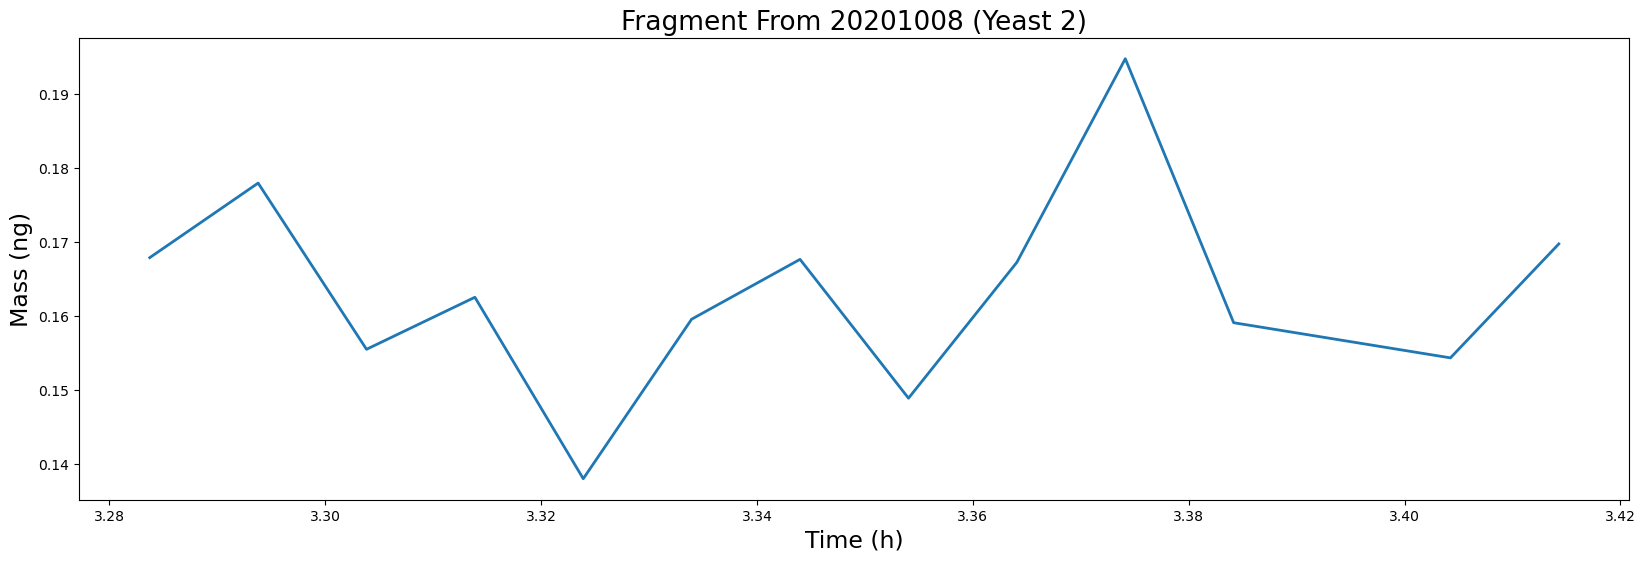

In [101]:
plt.plot(df008Y2['time'].iloc[df008Y2_motif_index : df008Y2_motif_index + m].values, df008Y2['mass'].iloc[df008Y2_motif_index : df008Y2_motif_index + m].values, label='20201008 (Yeast 2)', linewidth=2)

plt.title('Fragment From 20201008 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

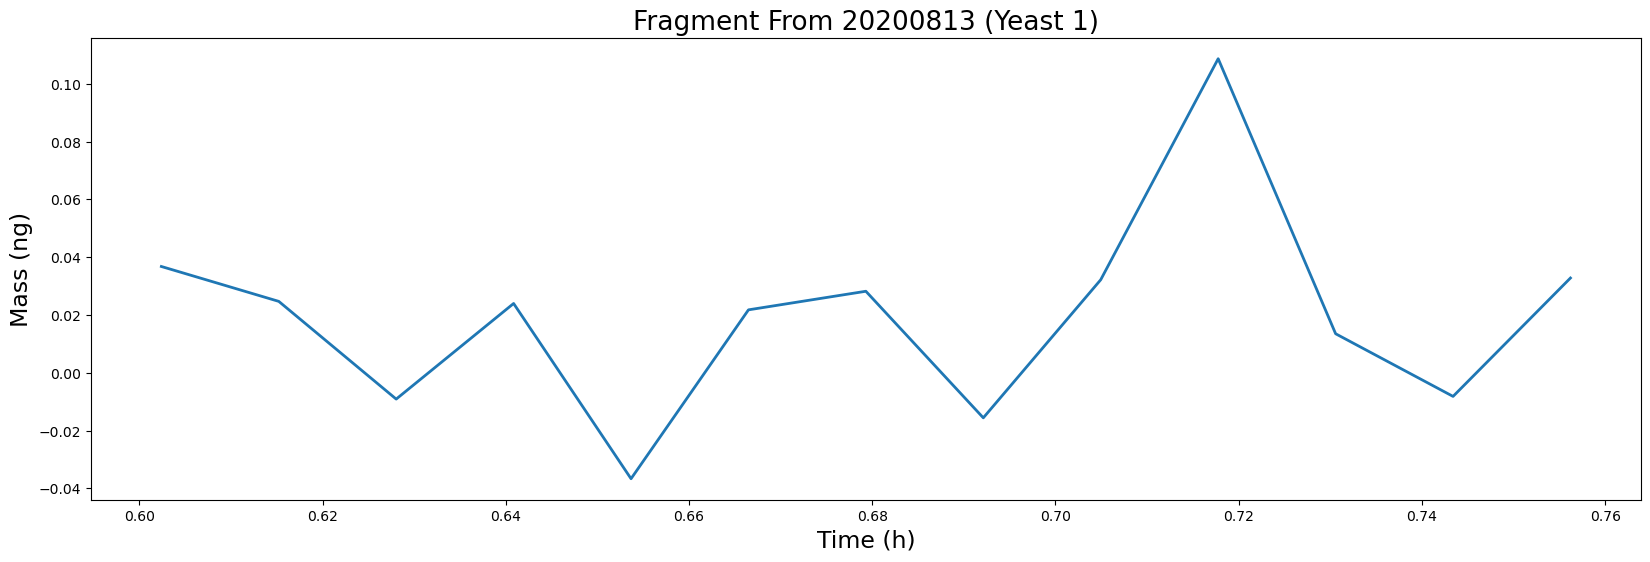

In [102]:
plt.plot(df13['time'].iloc[df13_motif_index : df13_motif_index + m].values, df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)

plt.title('Fragment From 20200813 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20200813 (Yeast 1) vs 20201009 (Yeast 1)

In [103]:
m = 8
mp13 = stumpy.stump(T_A = df13['mass'],
                  m = m,
                  T_B = df009Y1['mass'],
                  ignore_trivial = False)

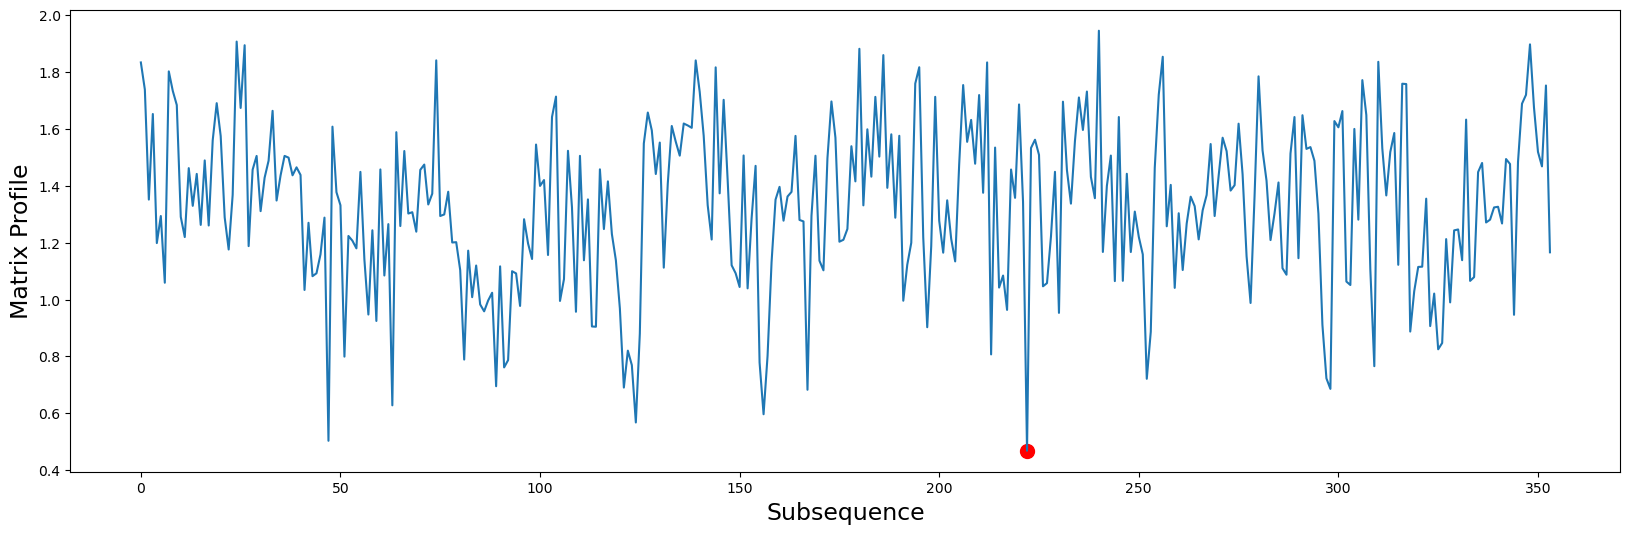

In [104]:
df13_motif_index = mp13[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df13_motif_index,
               mp13[df13_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp13[:,0])
plt.show()

In [105]:
df13_motif_index = mp13[:, 0].argmin()
print(f'The motif is located at index {df13_motif_index} of "20200813 (Yeast 1)"')

The motif is located at index 222 of "20200813 (Yeast 1)"


In [106]:
df009Y1_motif_index = mp13[df13_motif_index, 1]
print(f'The motif is located at index {df009Y1_motif_index} of "20201009 (Yeast 1)"')


The motif is located at index 337 of "20201009 (Yeast 1)"


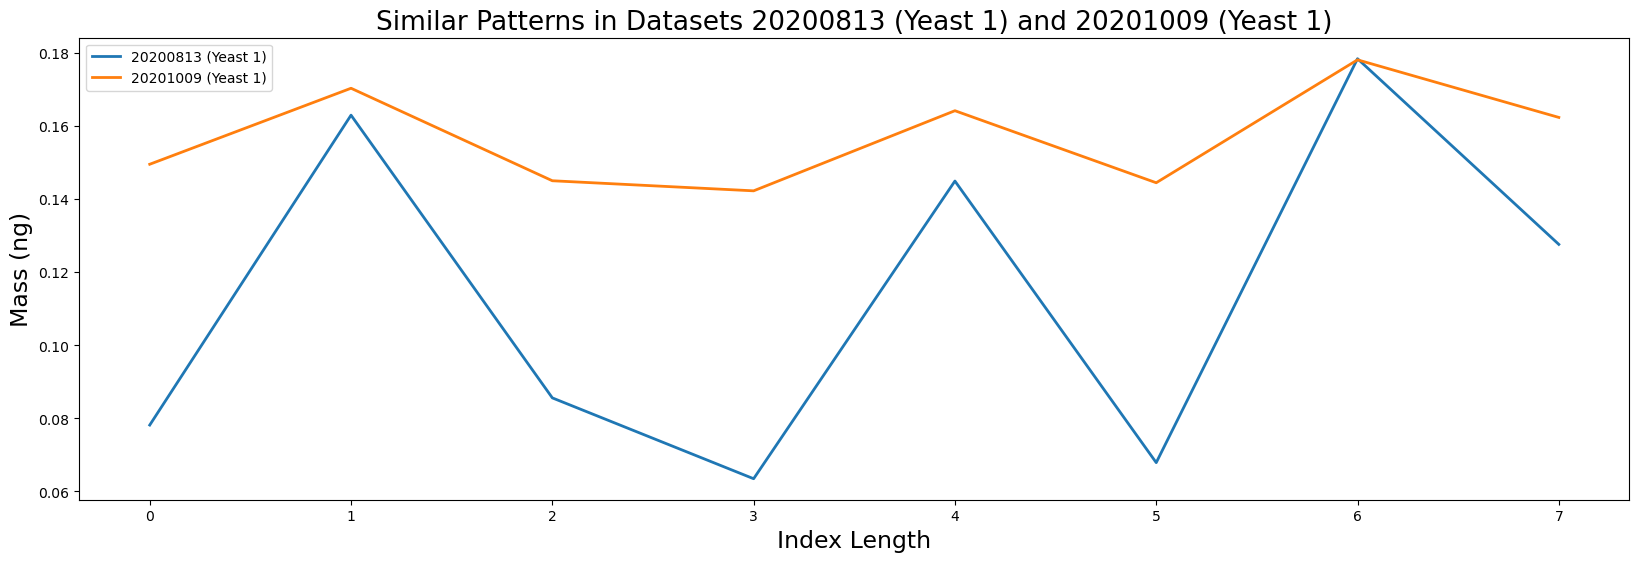

In [107]:
plt.plot(df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)
plt.plot(df009Y1['mass'].iloc[df009Y1_motif_index:df009Y1_motif_index+m].values, label='20201009 (Yeast 1)', linewidth=2)

plt.title('Similar Patterns in Datasets 20200813 (Yeast 1) and 20201009 (Yeast 1)', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

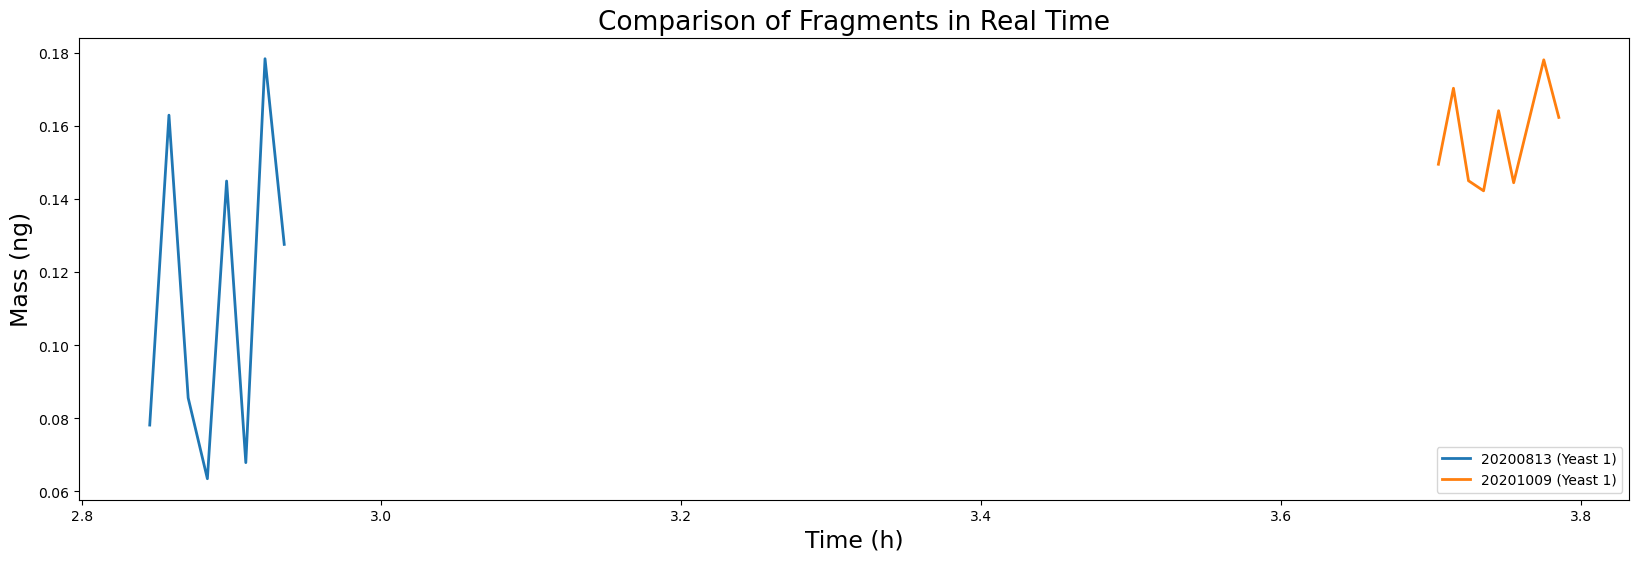

In [108]:
plt.plot(df13['time'].iloc[df13_motif_index : df13_motif_index + m].values, df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)
plt.plot(df009Y1['time'].iloc[df009Y1_motif_index : df009Y1_motif_index + m].values, df009Y1['mass'].iloc[df009Y1_motif_index : df009Y1_motif_index + m].values, label='20201009 (Yeast 1)', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

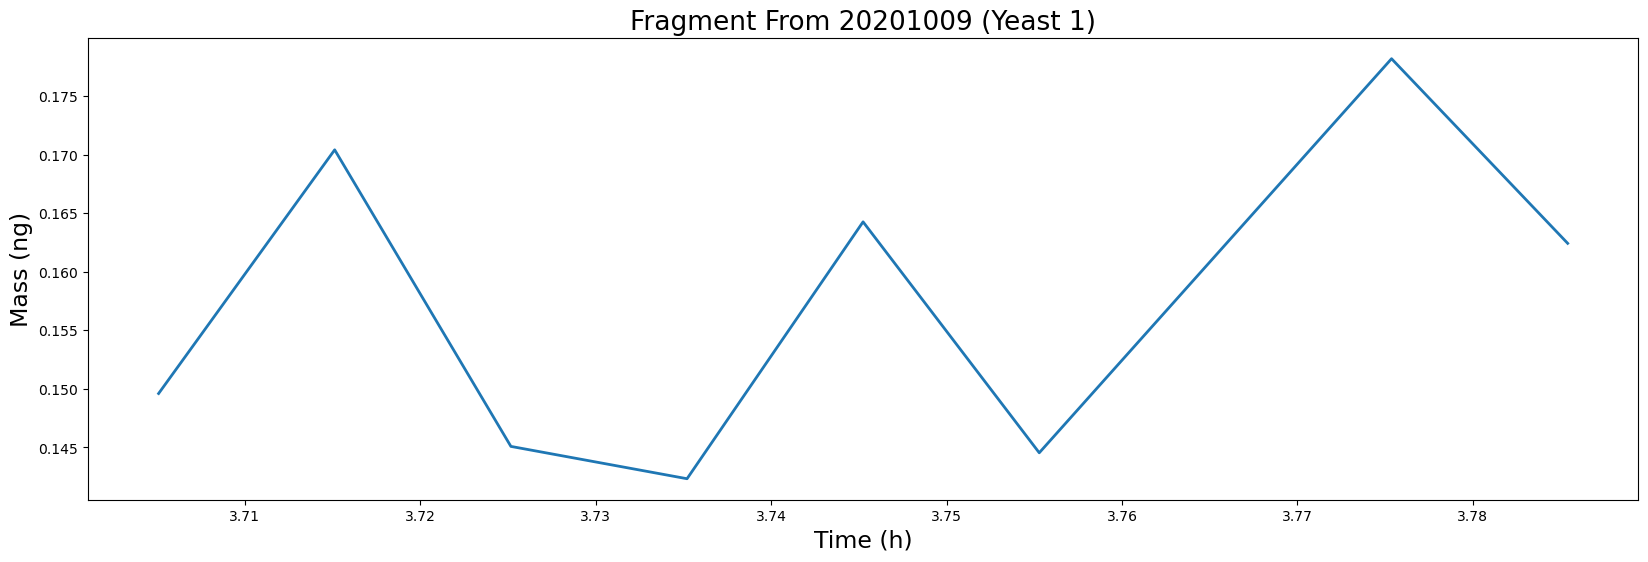

In [109]:
plt.plot(df009Y1['time'].iloc[df009Y1_motif_index : df009Y1_motif_index + m].values, df009Y1['mass'].iloc[df009Y1_motif_index : df009Y1_motif_index + m].values, label='20201009 (Yeast 1)', linewidth=2)
plt.title('Fragment From 20201009 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

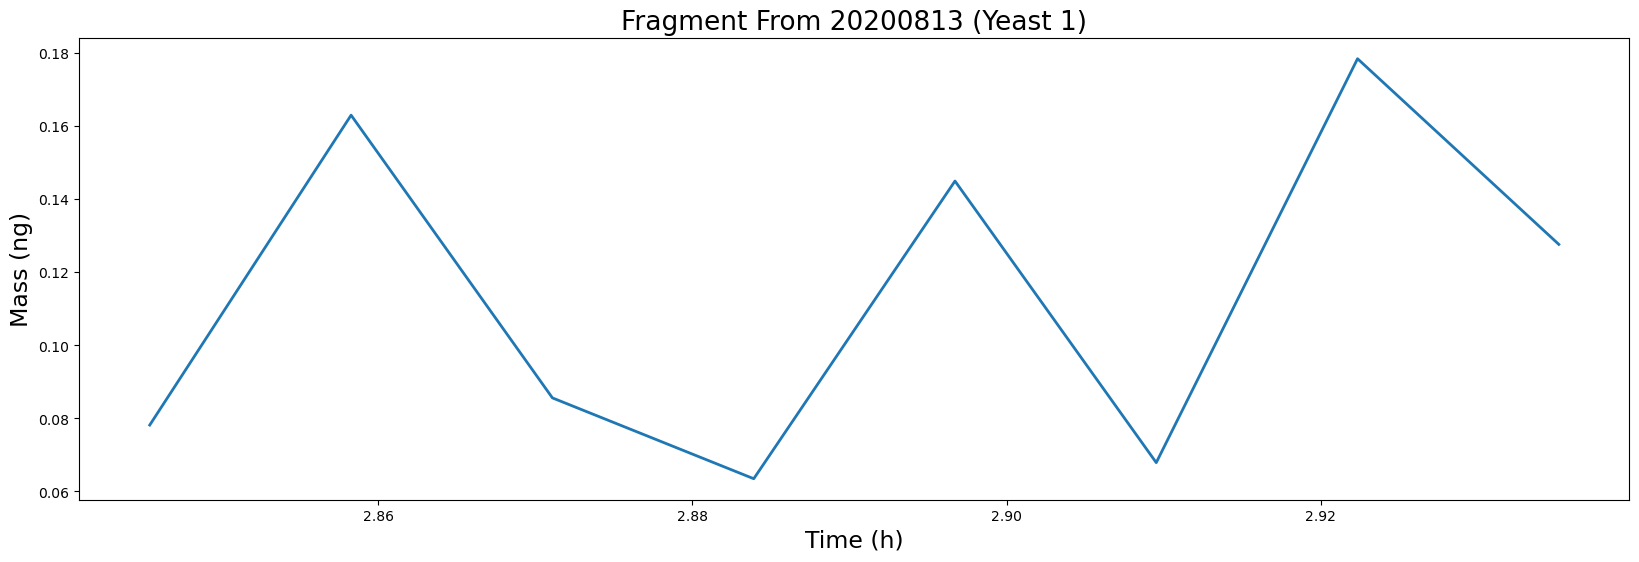

In [110]:
plt.plot(df13['time'].iloc[df13_motif_index : df13_motif_index + m].values, df13['mass'].iloc[df13_motif_index : df13_motif_index + m].values, label='20200813 (Yeast 1)', linewidth=2)

plt.title('Fragment From 20200813 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

# 20201007 and 20201009 (Yeast 1)

In [111]:
m = 8
mp007 = stumpy.stump(T_A = df007['mass'],
                  m = m,
                  T_B = df009Y1['mass'],
                  ignore_trivial = False)

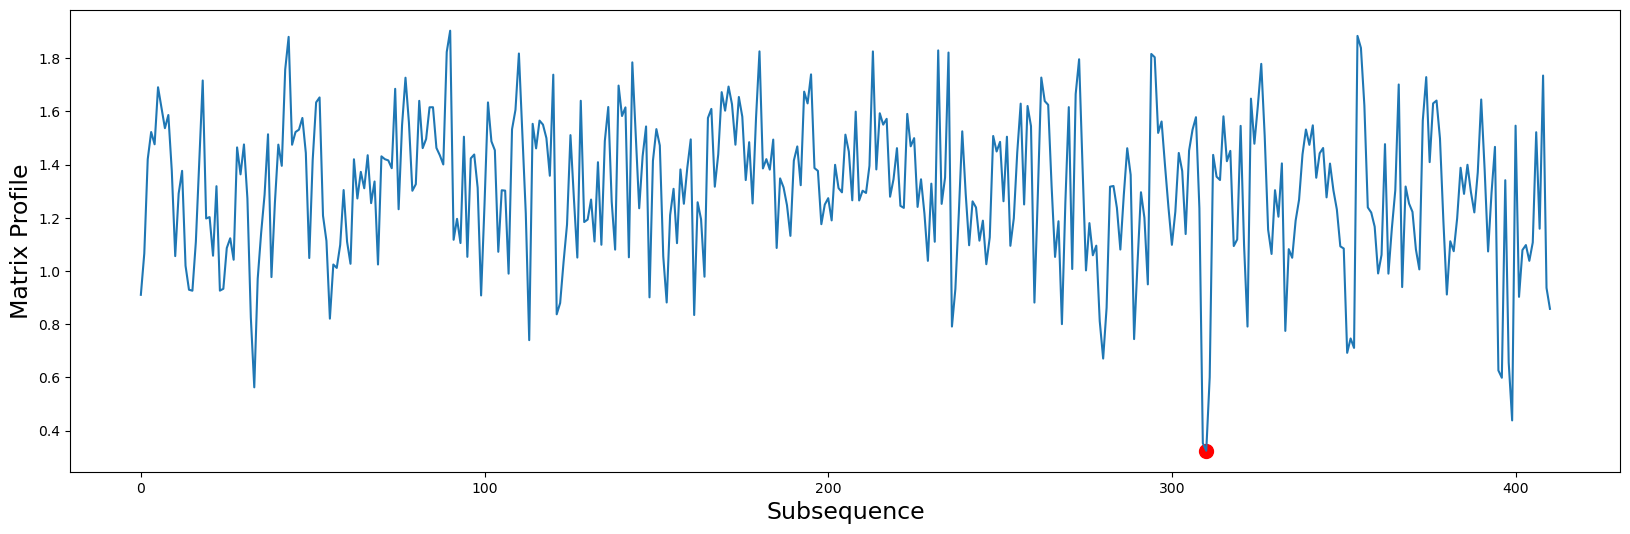

In [112]:
df007_motif_index = mp007[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df007_motif_index,
               mp007[df007_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp007[:,0])
plt.show()

In [113]:
df007_motif_index = mp007[:, 0].argmin()
print(f'The motif is located at index {df007_motif_index} of "20201007"')

The motif is located at index 310 of "20201007"


In [114]:
df009Y1_motif_index = mp007[df007_motif_index, 1]
print(f'The motif is located at index {df009Y1_motif_index} of "20201009 (Yeast 1)"')

The motif is located at index 280 of "20201009 (Yeast 1)"


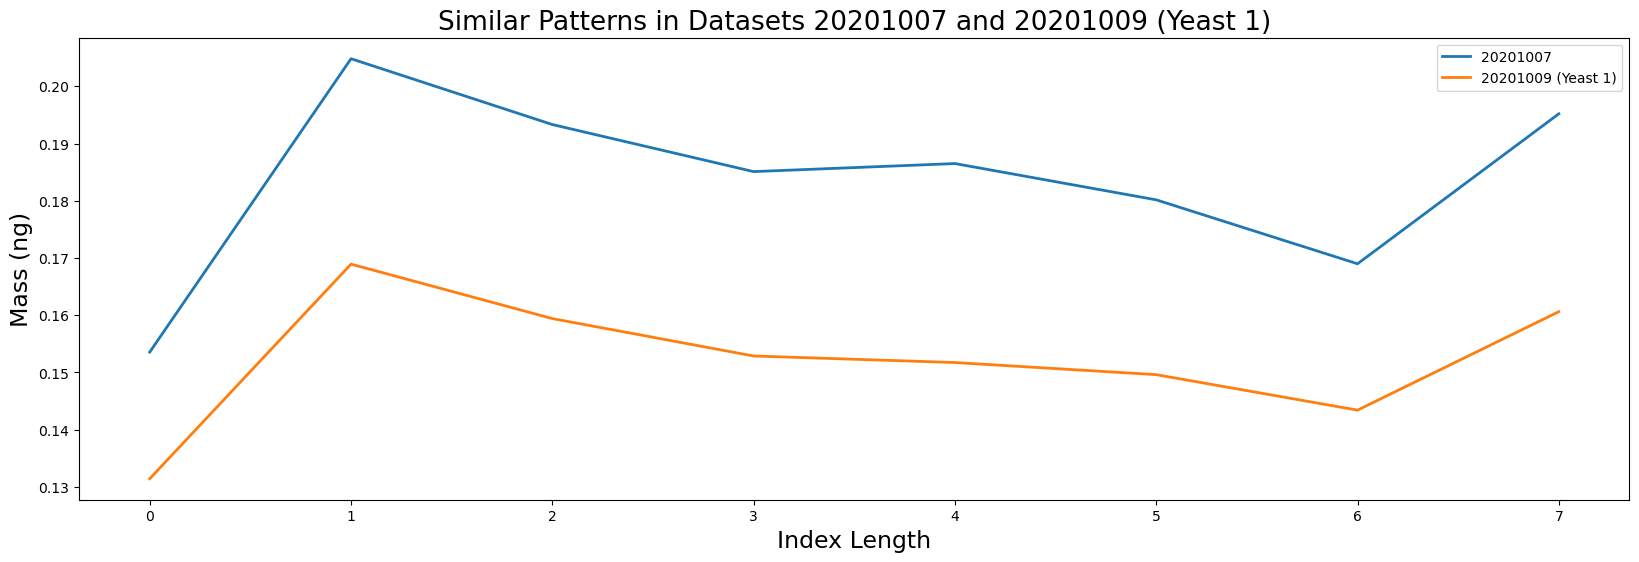

In [115]:
plt.plot(df007['mass'].iloc[df007_motif_index : df007_motif_index + m].values, label='20201007', linewidth=2)
plt.plot(df009Y1['mass'].iloc[df009Y1_motif_index:df009Y1_motif_index+m].values, label='20201009 (Yeast 1)', linewidth=2)

plt.title('Similar Patterns in Datasets 20201007 and 20201009 (Yeast 1)', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

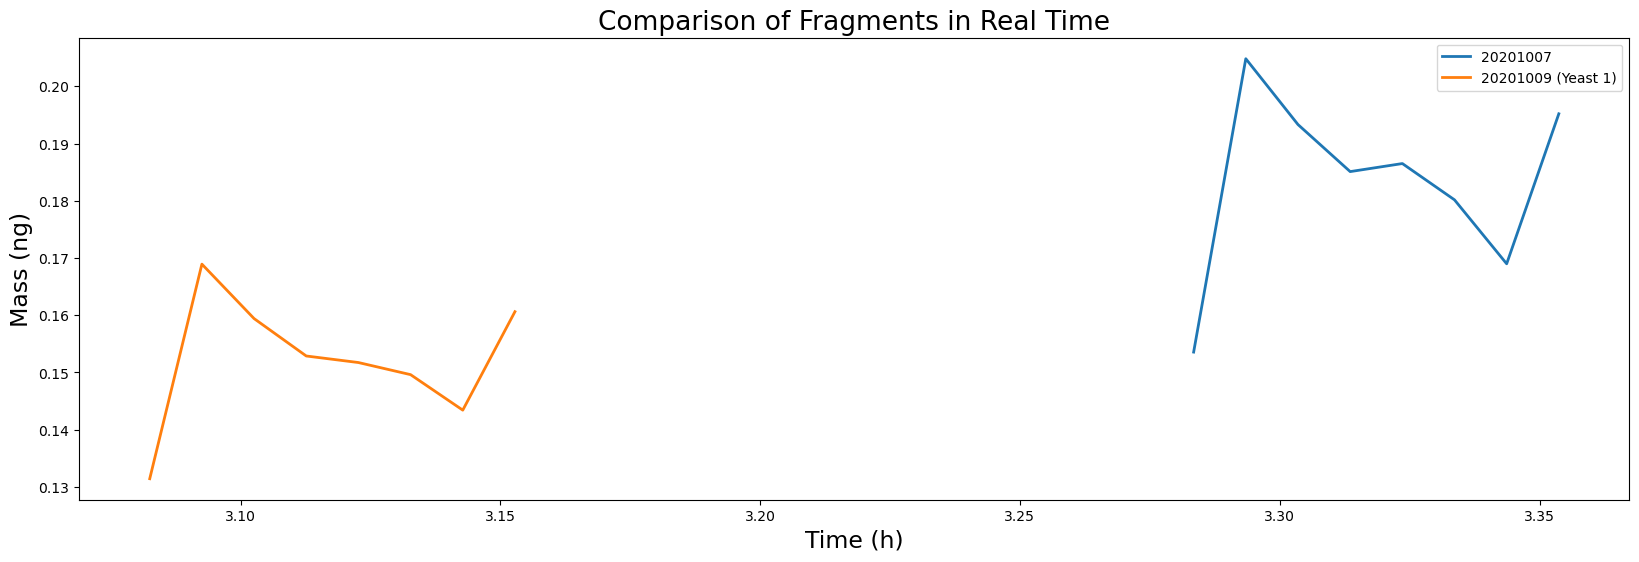

In [116]:
plt.plot(df007['time'].iloc[df007_motif_index : df007_motif_index + m].values, df007['mass'].iloc[df007_motif_index : df007_motif_index + m].values, label='20201007', linewidth=2)
plt.plot(df009Y1['time'].iloc[df009Y1_motif_index : df009Y1_motif_index + m].values, df009Y1['mass'].iloc[df009Y1_motif_index : df009Y1_motif_index + m].values, label='20201009 (Yeast 1)', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

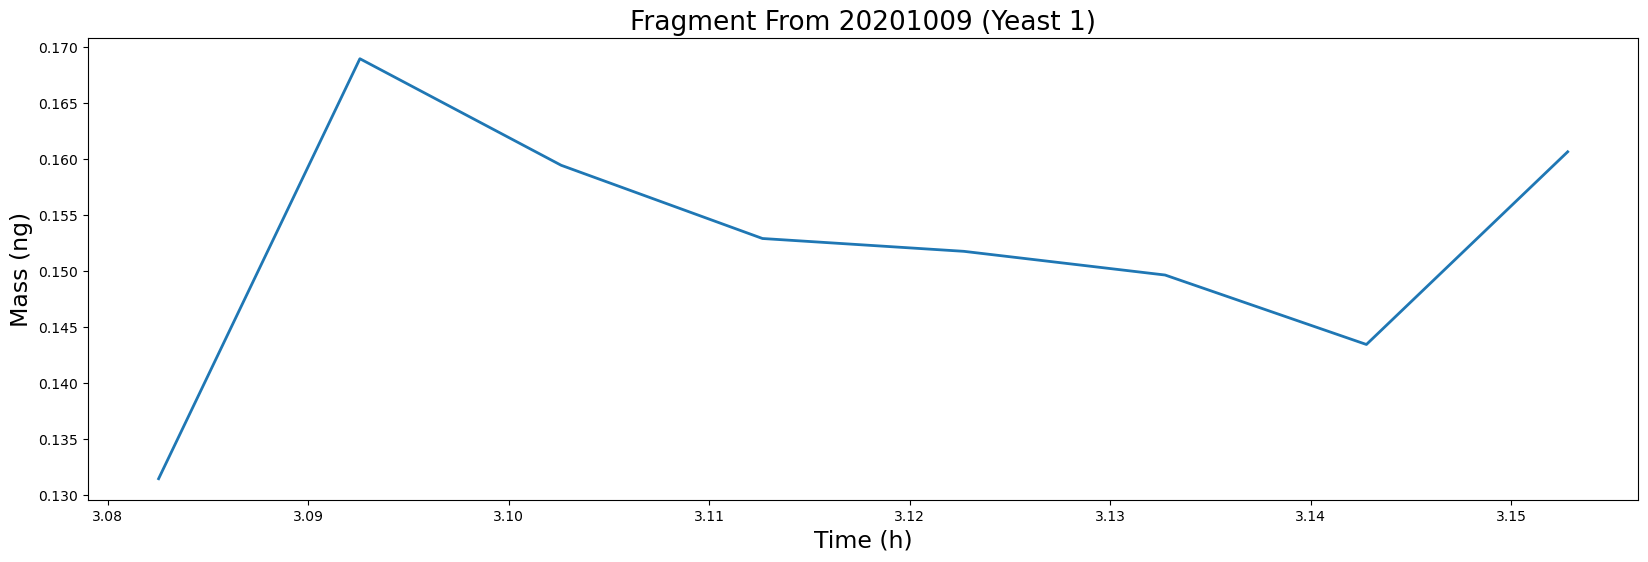

In [117]:
plt.plot(df009Y1['time'].iloc[df009Y1_motif_index : df009Y1_motif_index + m].values, df009Y1['mass'].iloc[df009Y1_motif_index : df009Y1_motif_index + m].values, label='20201009 (Yeast 1)', linewidth=2)

plt.title('Fragment From 20201009 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

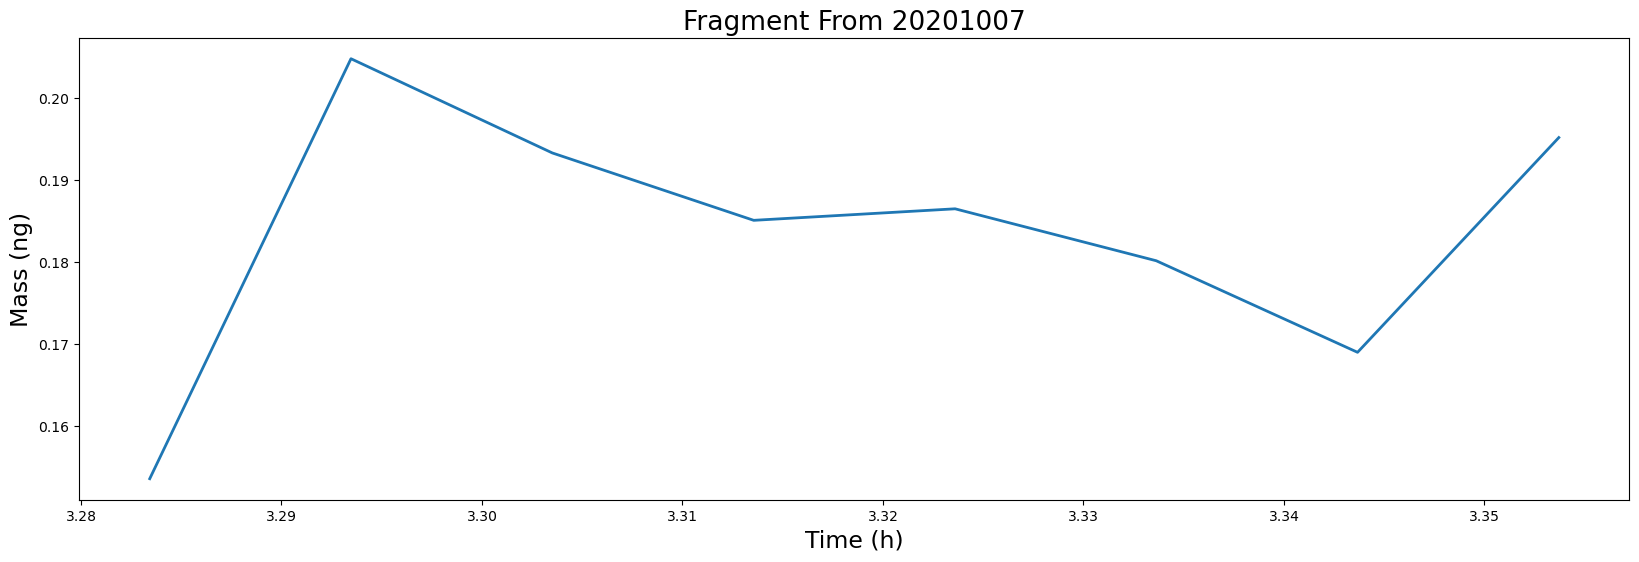

In [118]:
plt.plot(df007['time'].iloc[df007_motif_index : df007_motif_index + m].values, df007['mass'].iloc[df007_motif_index : df007_motif_index + m].values, label='20201007', linewidth=2)
plt.title('Fragment From 20201007', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()